# 0 - Load modules

In [1]:
import sys
import xarray as xr
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import glob
from netCDF4 import Dataset
import cartopy.crs as ccrs
import json
import os
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline



/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
reg='GS'
config='GS36'


In [3]:
def plot_prof(maxdep,dm1,dm2,dm3,ref,temp_en4,salt_en4,mean_temp_model1,mean_salt_model1,mean_temp_model2,mean_salt_model2,mean_temp_model3,mean_salt_model3):


    fig, axs = plt.subplots(1,2, figsize=(10, 10))
    axs = axs.ravel()
    title = ref+' depen4 = '+str(d)+' dep1 = '+str(dm1)+' dep2 = '+str(dm2)+' dep3 = '+str(dm3)
    plt.suptitle(title,size = 25,y=1.05)

    axs[0].plot(mean_temp_model1,vert_standart,'r.-', label=reg+'36-75')
    axs[0].plot(mean_temp_model2,vert_standart,'b.-', label=reg+'36-150surf')
    axs[0].plot(mean_temp_model3,vert_standart,'g.-', label=reg+'36-150arctan')
    axs[0].plot(temp_en4,vert_standart,'k.-', label='EN4 obs')
    axs[0].set_ylabel('Depth [m]', size=14)
    axs[0].set_ylabel('Temperature [degC]', size=14)
    axs[0].grid(True, which='both')
    axs[0].set_ylim(maxdep, 0)
    axs[0].xaxis.tick_top()
    axs[0].xaxis.set_label_position('top') 

    axs[1].plot(mean_salt_model1,vert_standart,'r.-', label=reg+'36-75')
    axs[1].plot(mean_salt_model2,vert_standart,'b.-', label=reg+'36-150surf')
    axs[1].plot(mean_salt_model3,vert_standart,'g.-', label=reg+'36-150arctan')
    axs[1].plot(salt_en4,vert_standart,'k.-', label='EN4 obs')
    axs[1].set_ylabel('Depth [m]', size=14)
    axs[1].set_ylabel('Salinity [PSU]', size=14)
    axs[1].grid(True, which='both')
    axs[1].set_ylim(maxdep, 0)
    axs[1].xaxis.tick_top()
    axs[1].xaxis.set_label_position('top') 

    plt.legend()
    fig.tight_layout()
    plt.savefig('Plots/Plot_profile_'+ref+'GS-allsimus.png')


ok for MPC001
ok for MPC002
ok for MPC003
ok for MPC001
ok for MPC002
ok for MPC003
ok for MPC001
ok for MPC002
ok for MPC003
ok for MPC001
ok for MPC002
ok for MPC003
ok for MPC001
ok for MPC002
ok for MPC003
ok for MPC001
ok for MPC002
ok for MPC003
ok for MPC001
ok for MPC002
ok for MPC003
ok for MPC001
ok for MPC002
ok for MPC003
ok for MPC001
ok for MPC002
ok for MPC003
ok for MPC001
ok for MPC002
ok for MPC003
ok for MPC001
ok for MPC002
ok for MPC003
ok for MPC001
ok for MPC002
ok for MPC003
ok for MPC001
ok for MPC002
ok for MPC003
ok for MPC001
ok for MPC002
ok for MPC003
ok for MPC001
ok for MPC002
ok for MPC003
ok for MPC001
ok for MPC002
ok for MPC003
ok for MPC001
ok for MPC002
ok for MPC003
ok for MPC001
ok for MPC002
ok for MPC003
ok for MPC001
ok for MPC002
ok for MPC003
ok for MPC001
ok for MPC002
ok for MPC003
ok for MPC001
ok for MPC002
ok for MPC003
ok for MPC001
ok for MPC002
ok for MPC003
ok for MPC001
ok for MPC002
ok for MPC003
ok for MPC001
ok for MPC002
ok for

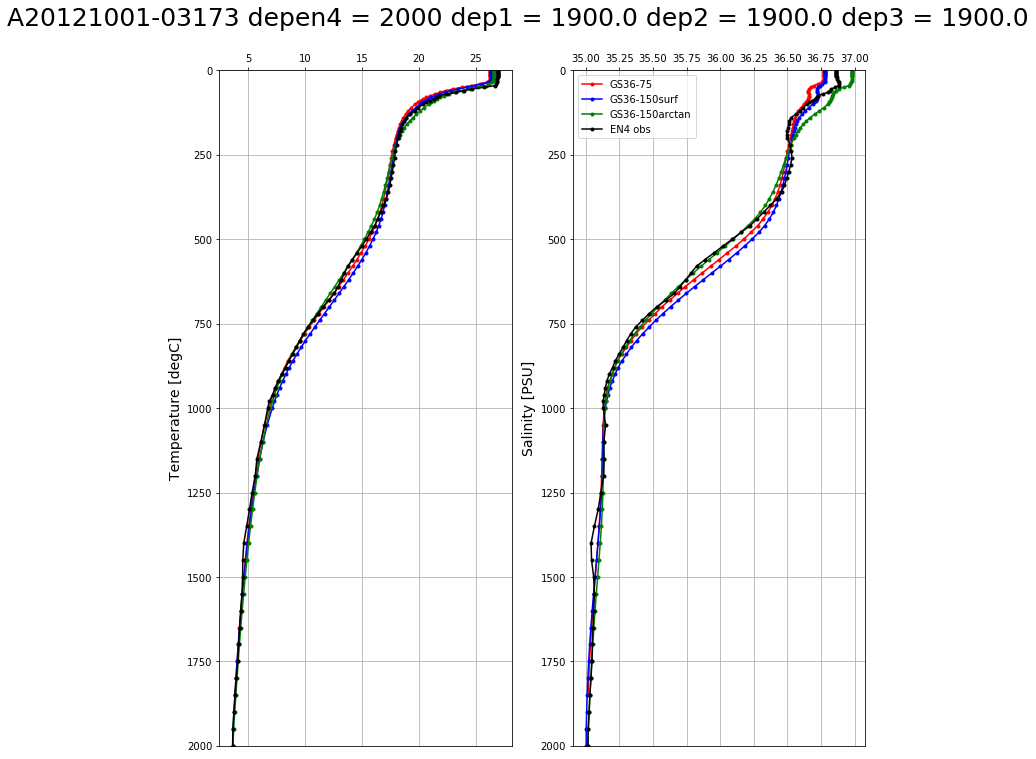

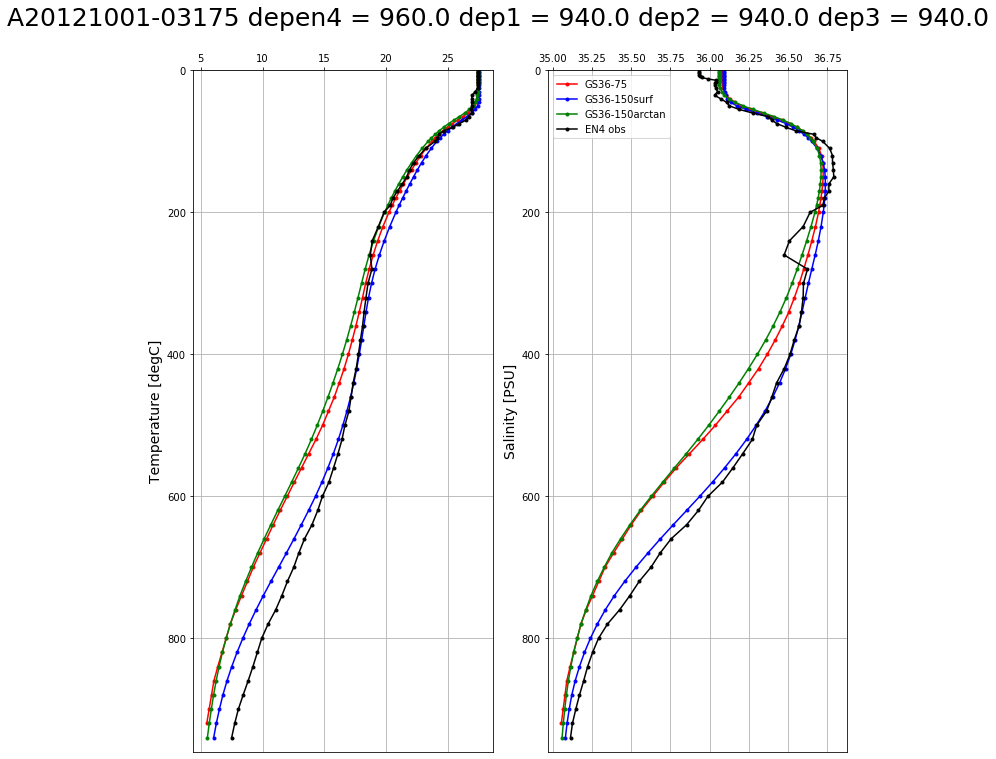

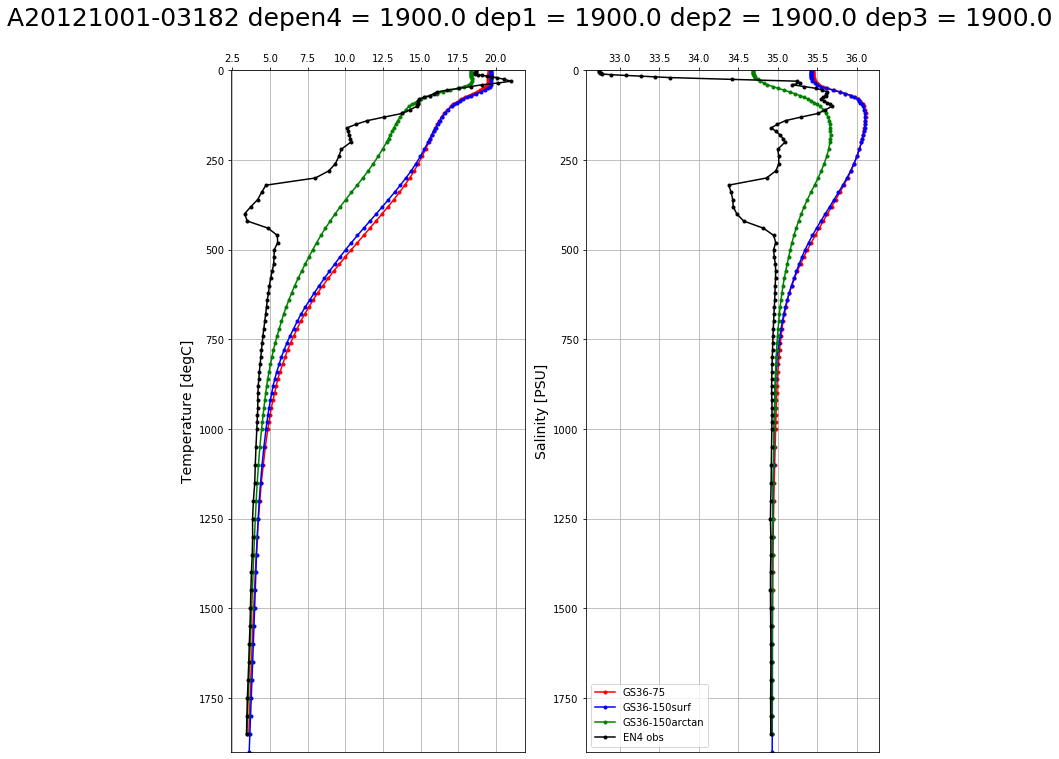

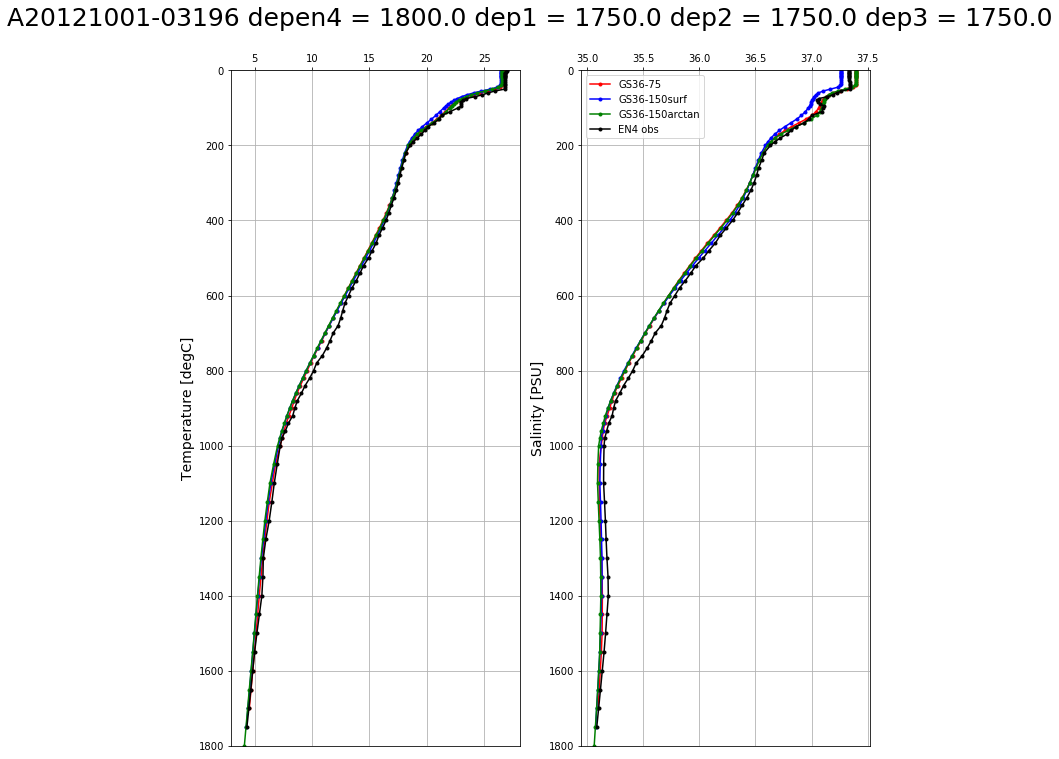

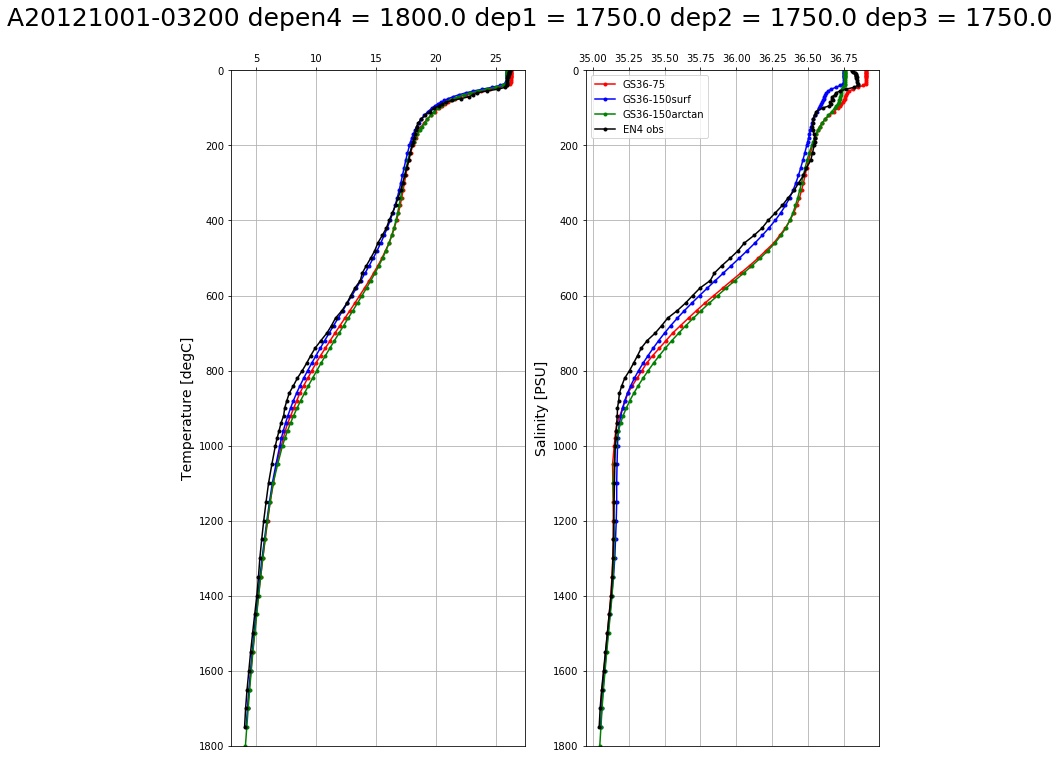

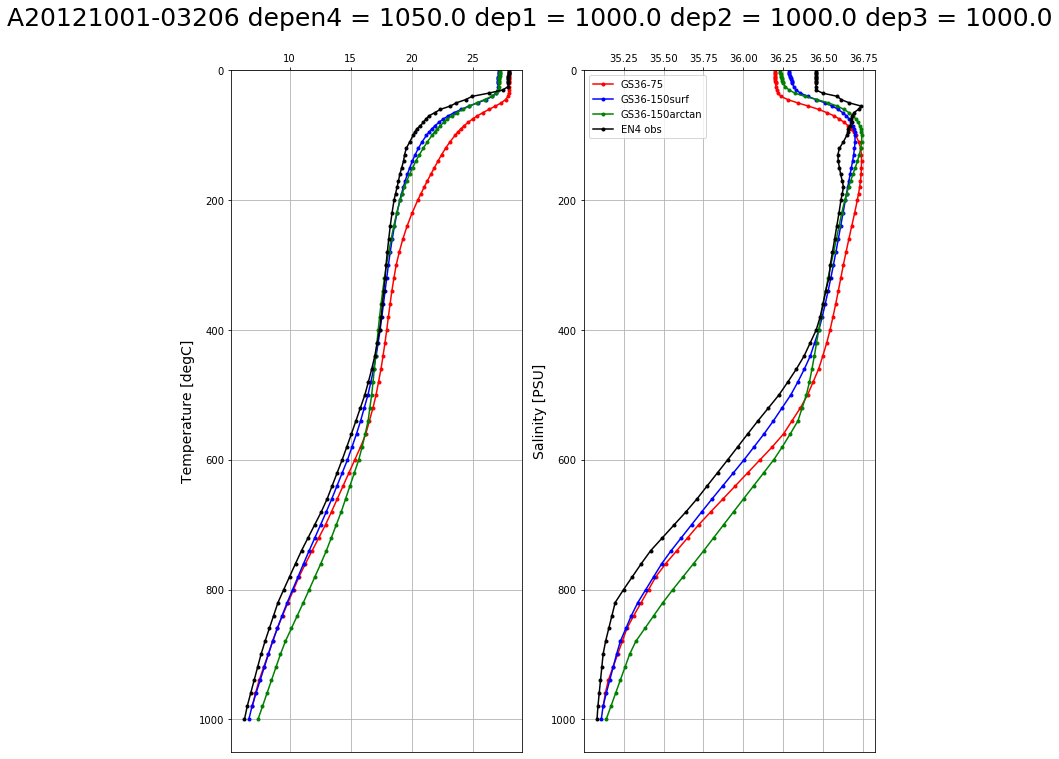

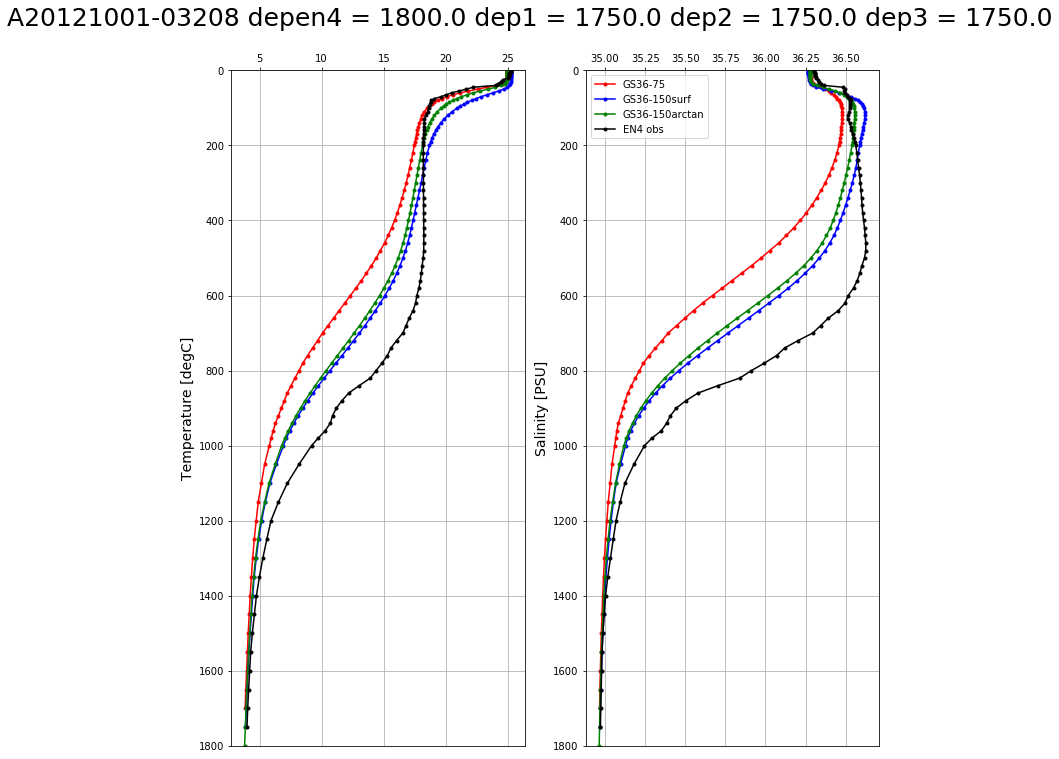

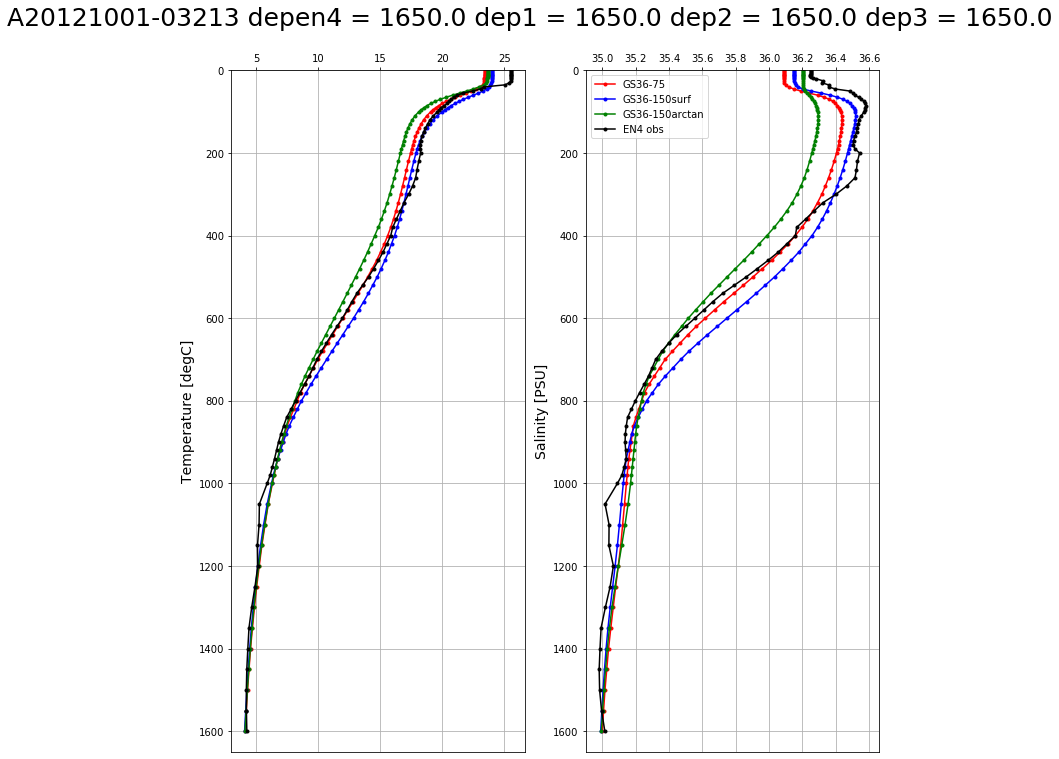

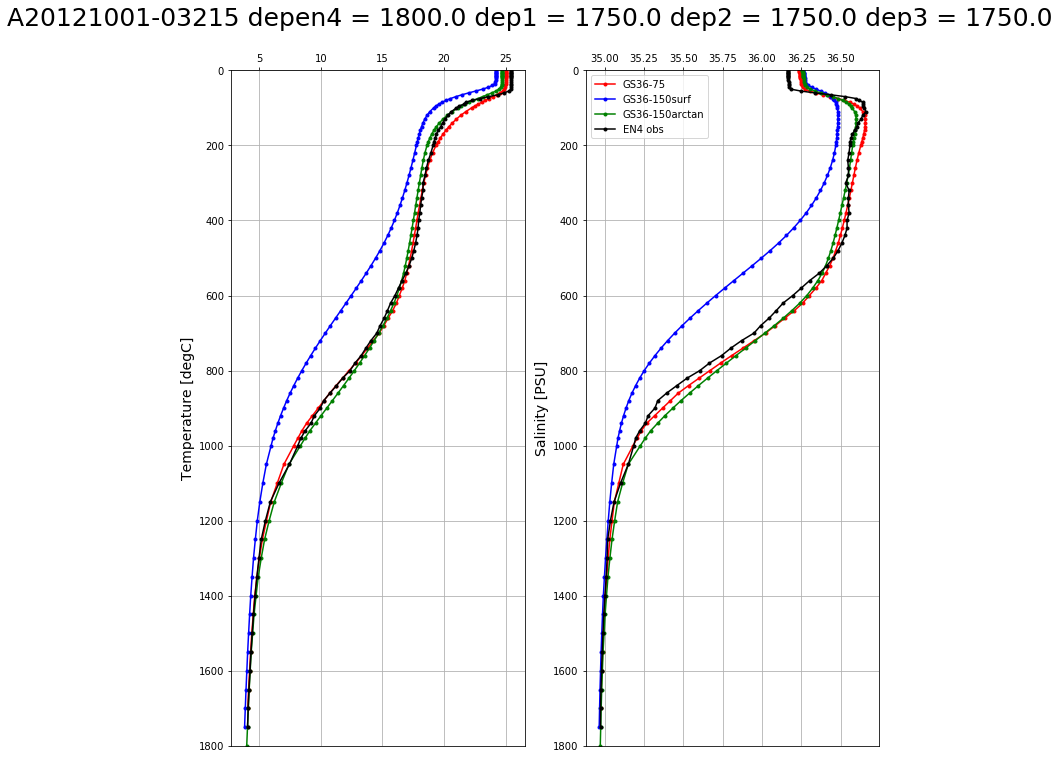

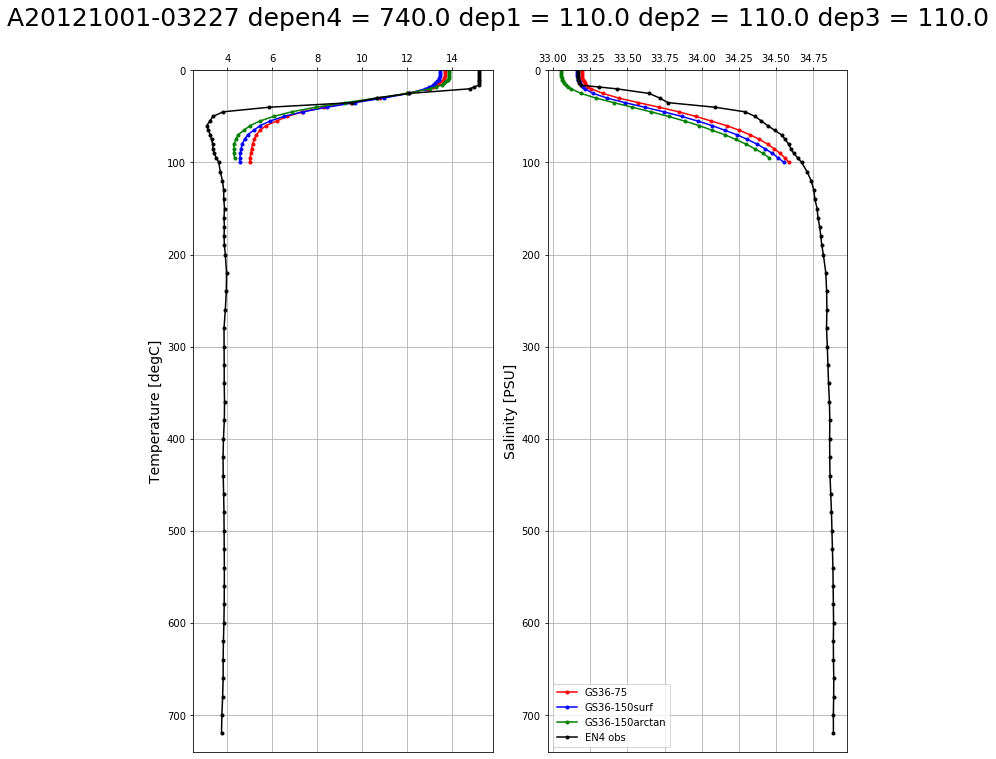

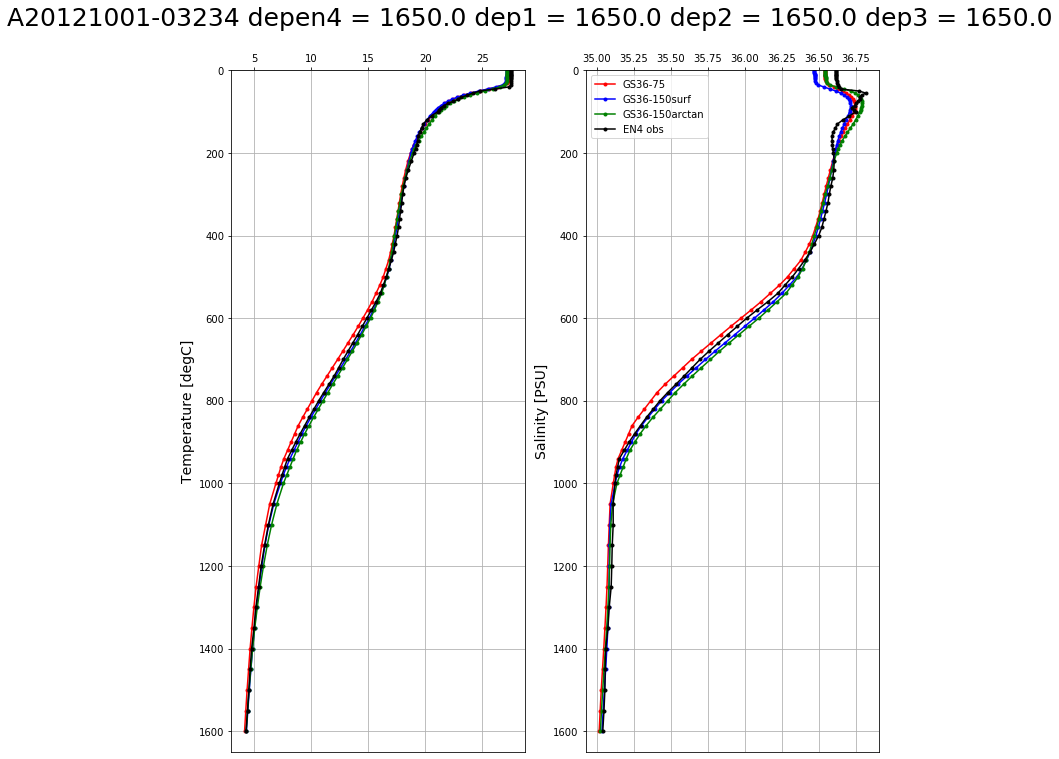

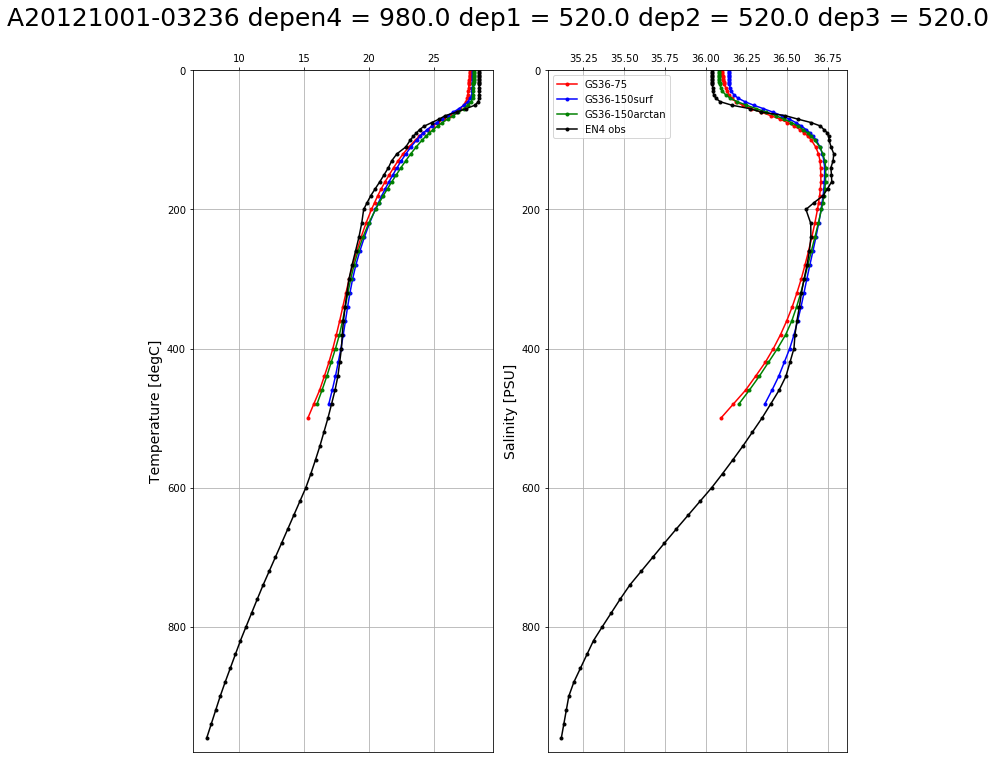

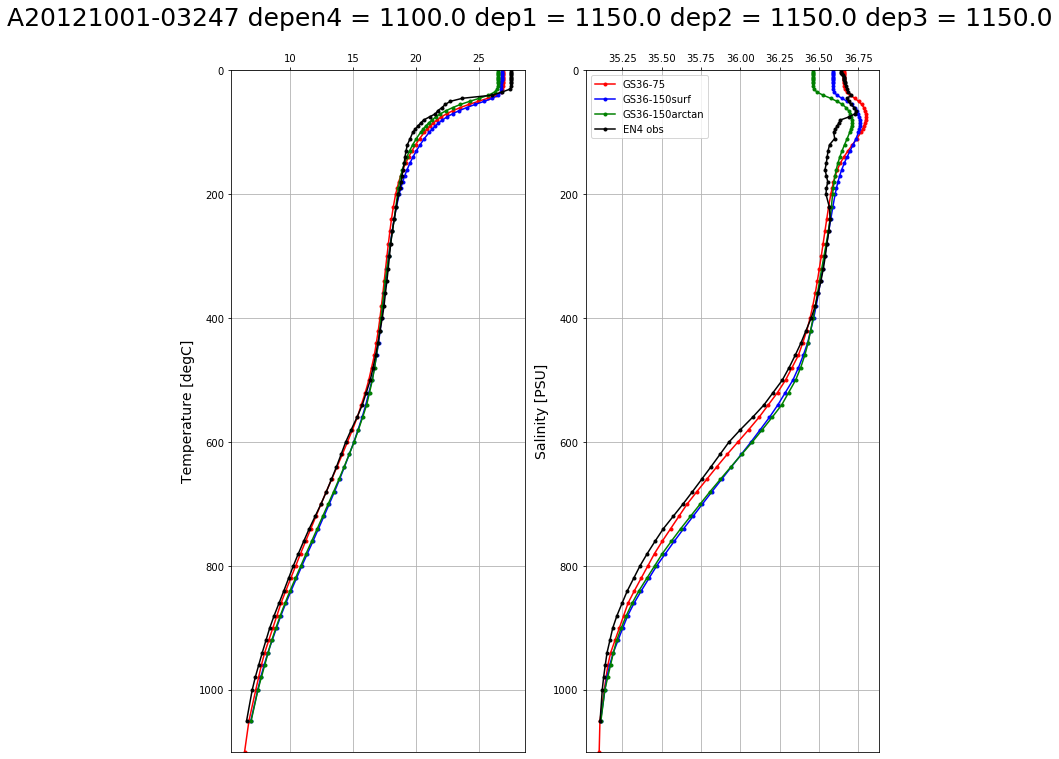

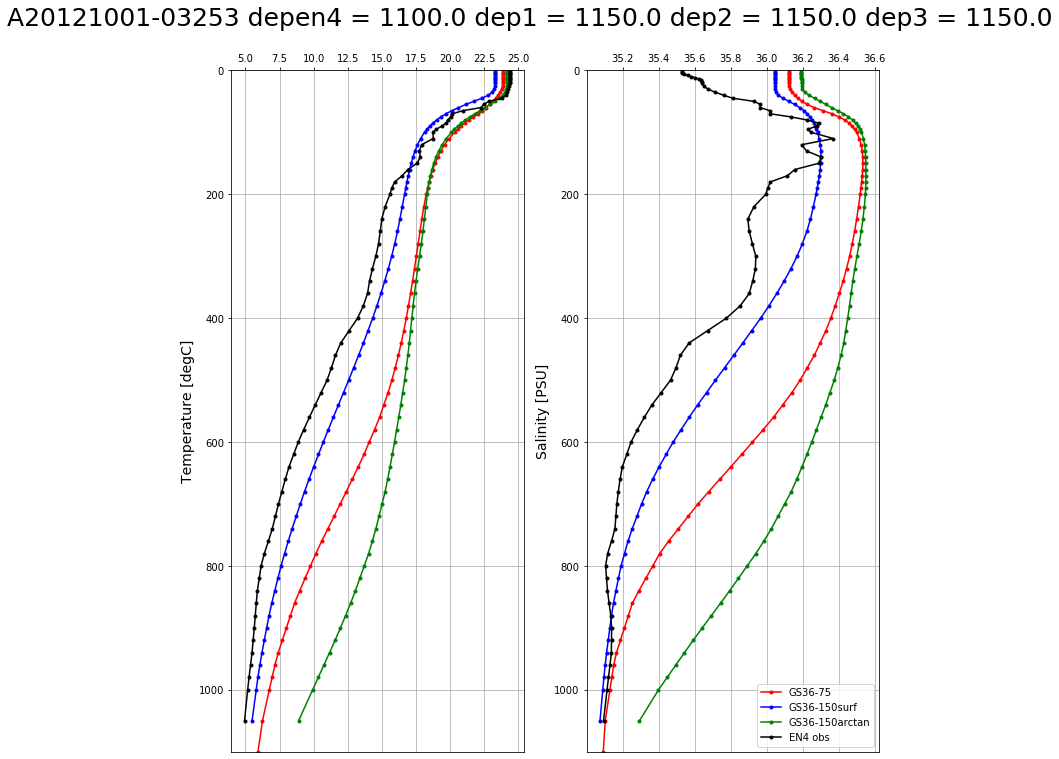

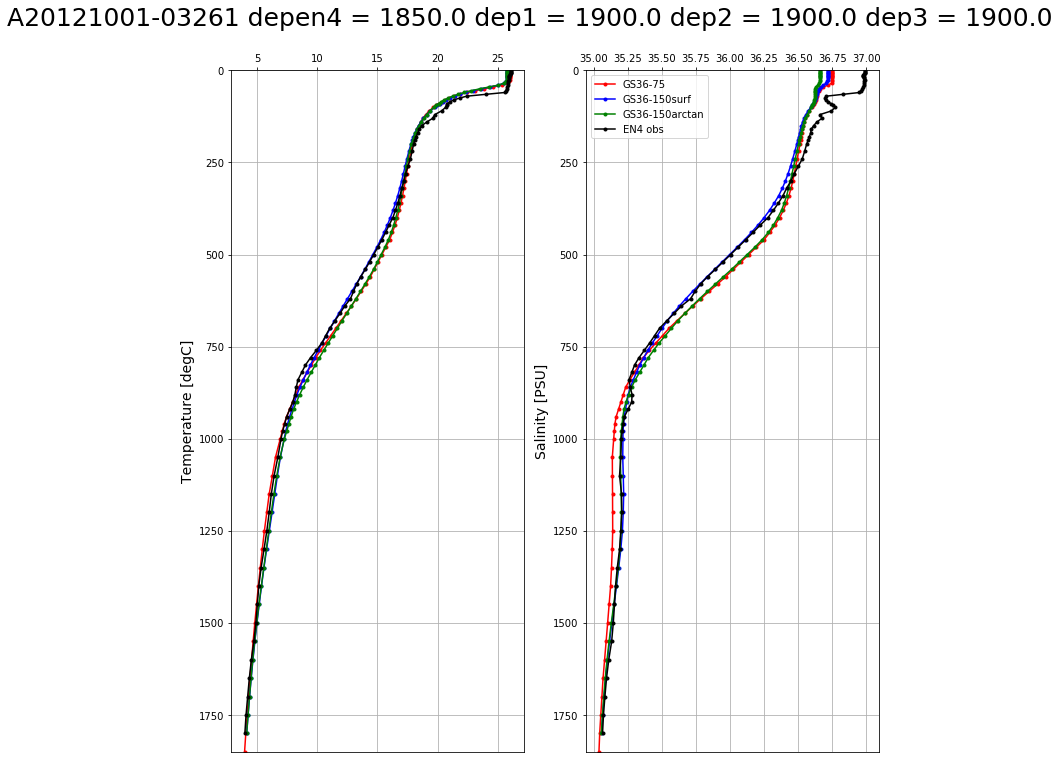

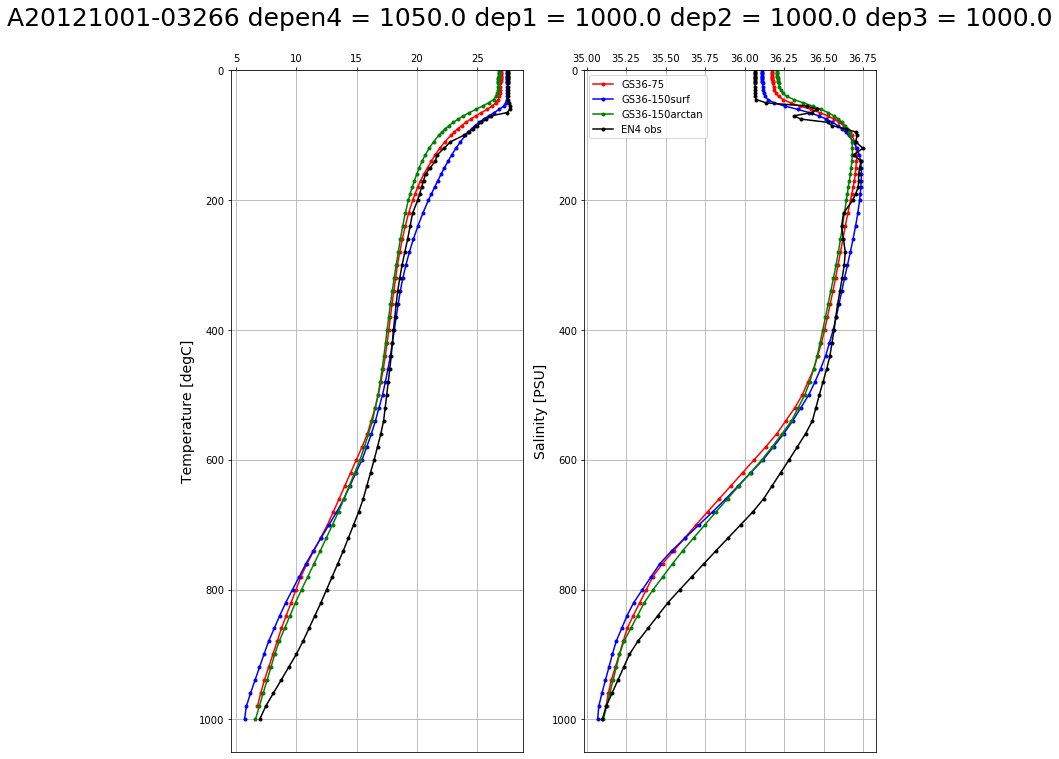

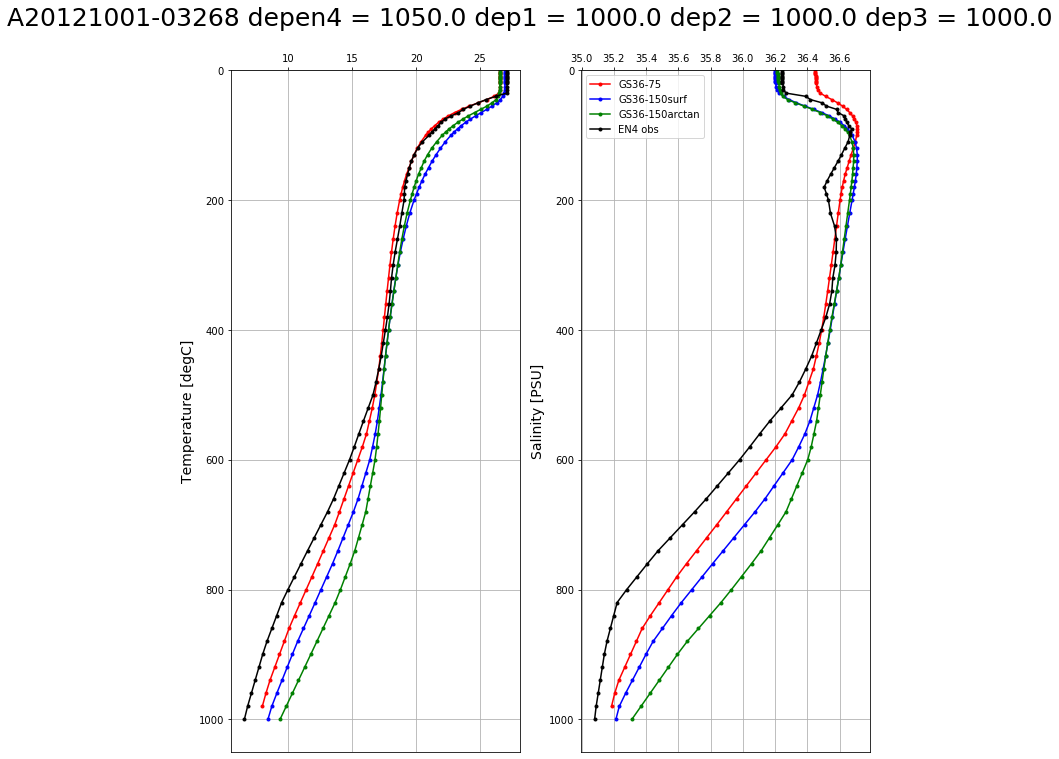

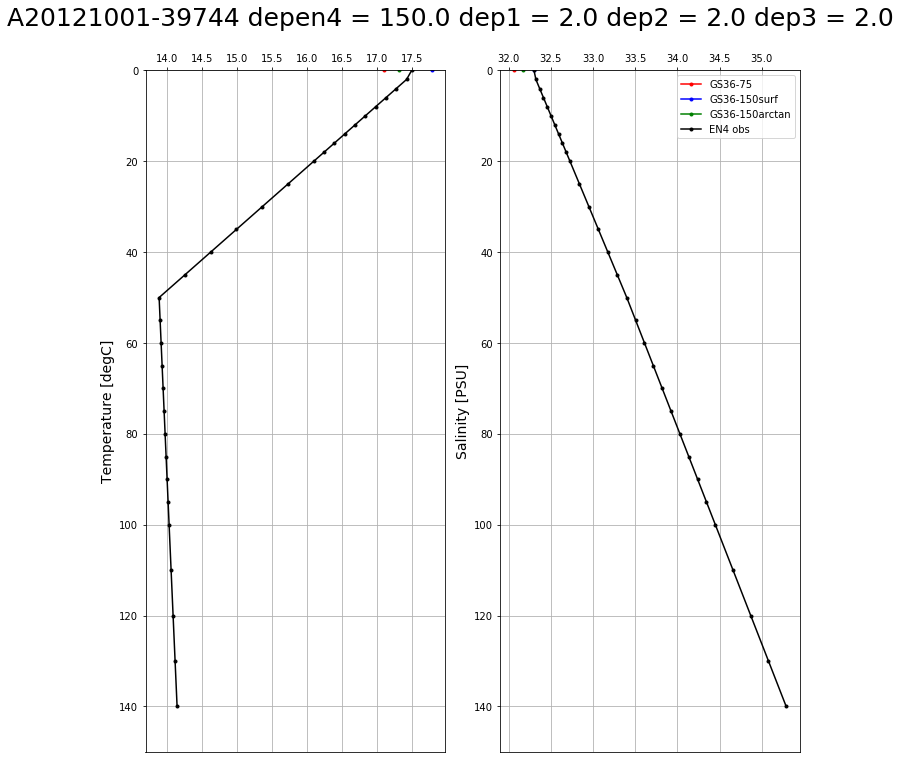

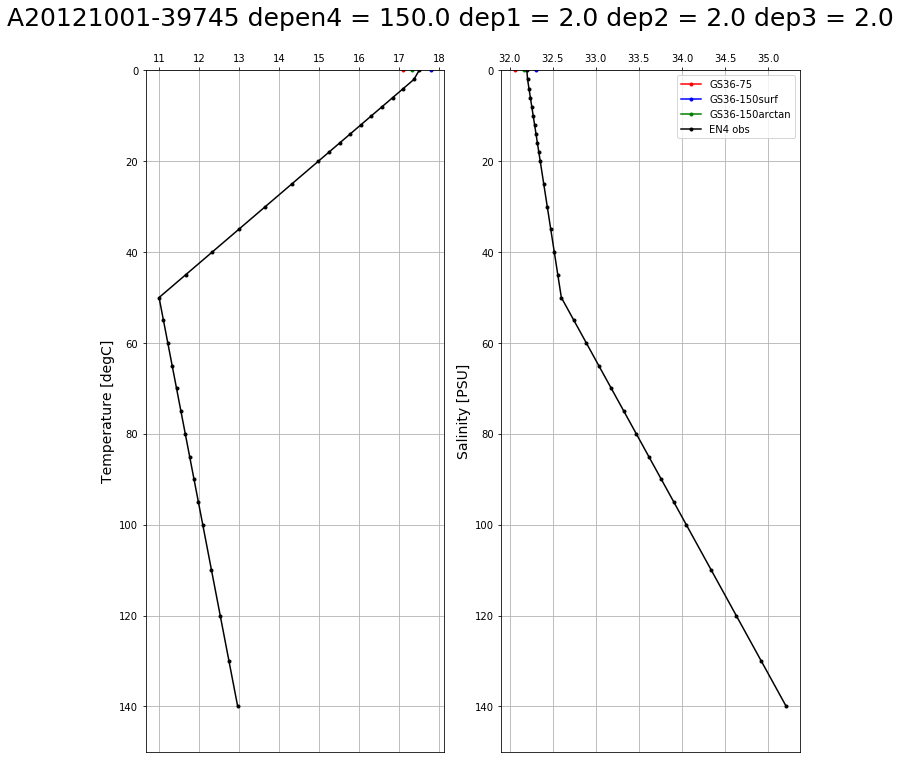

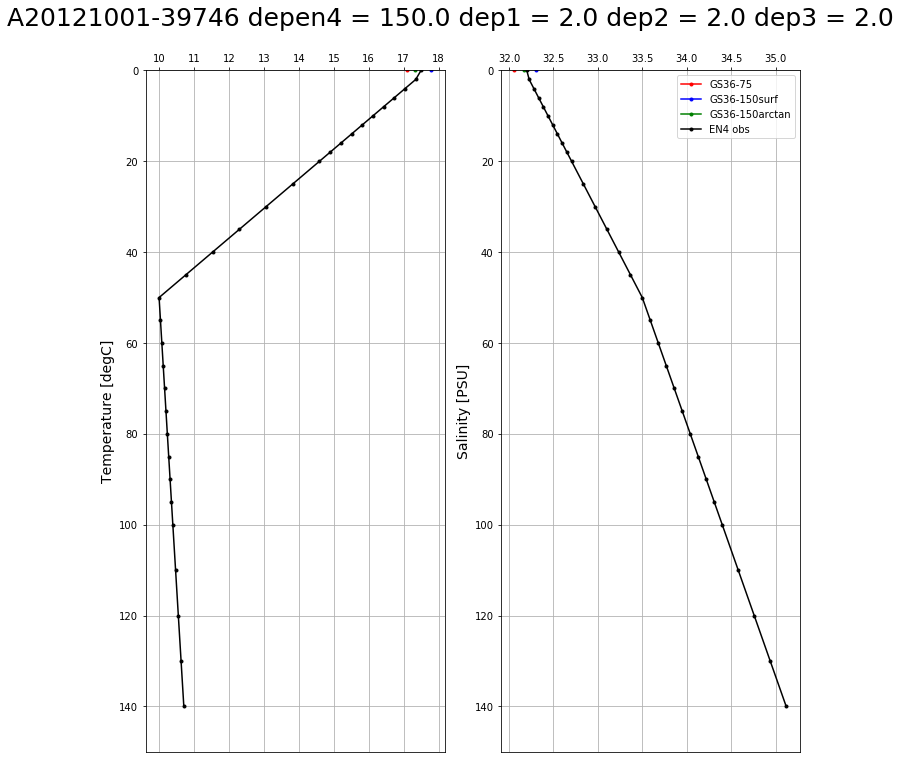

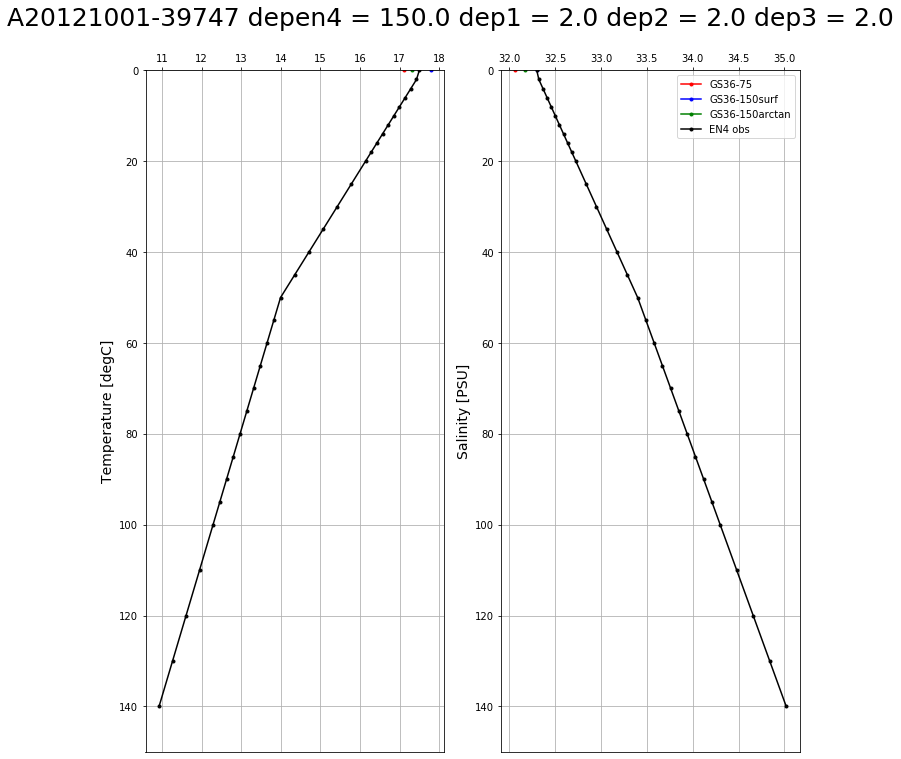

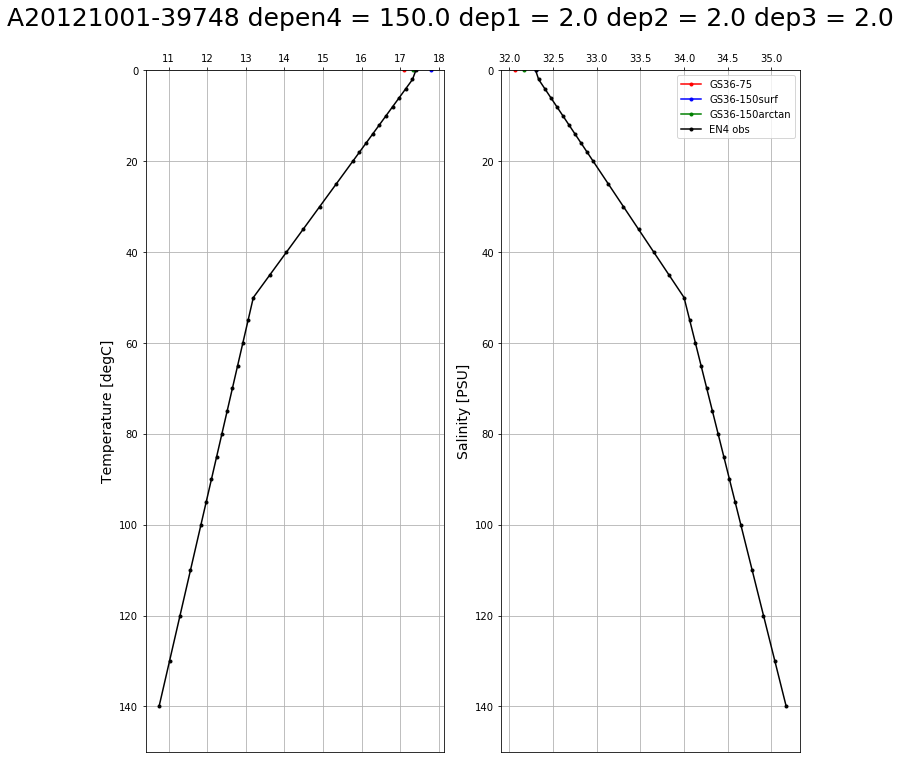

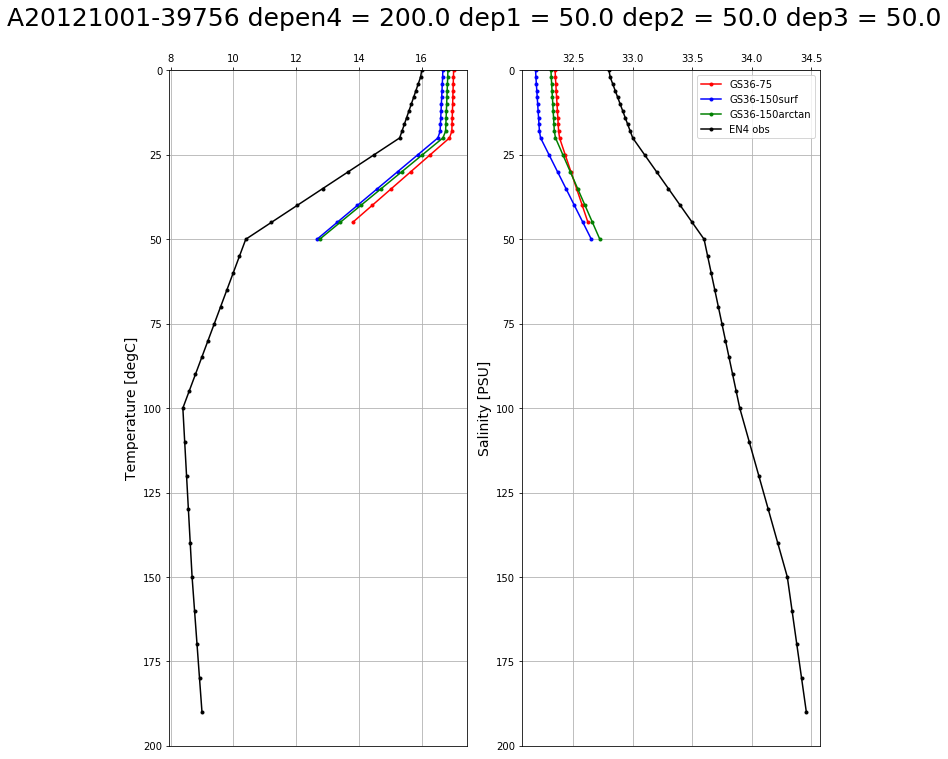

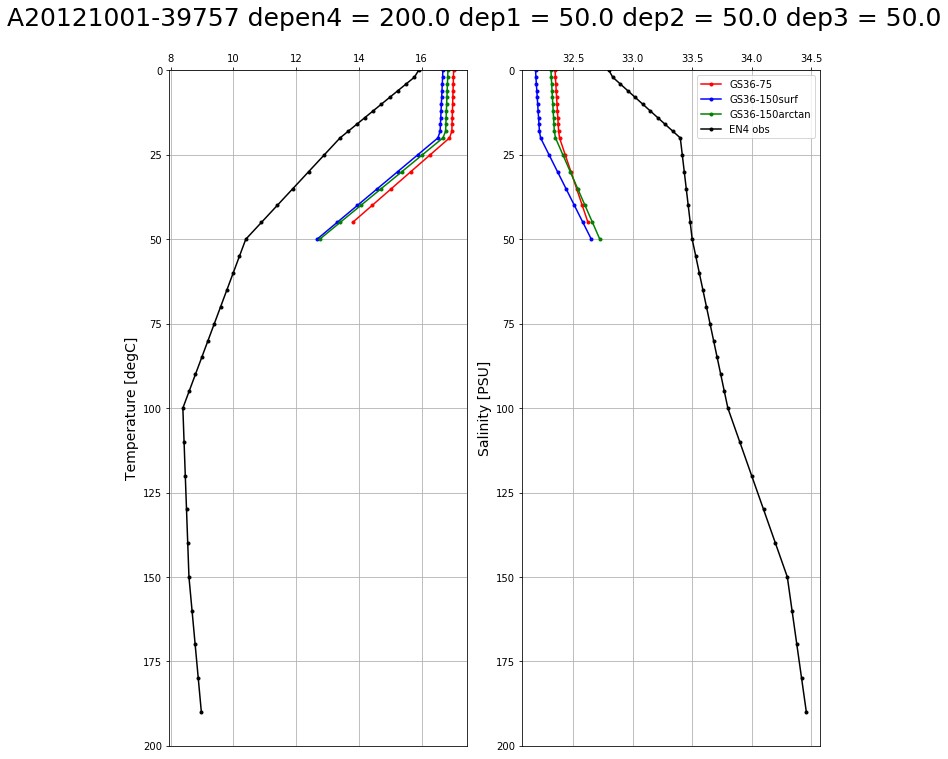

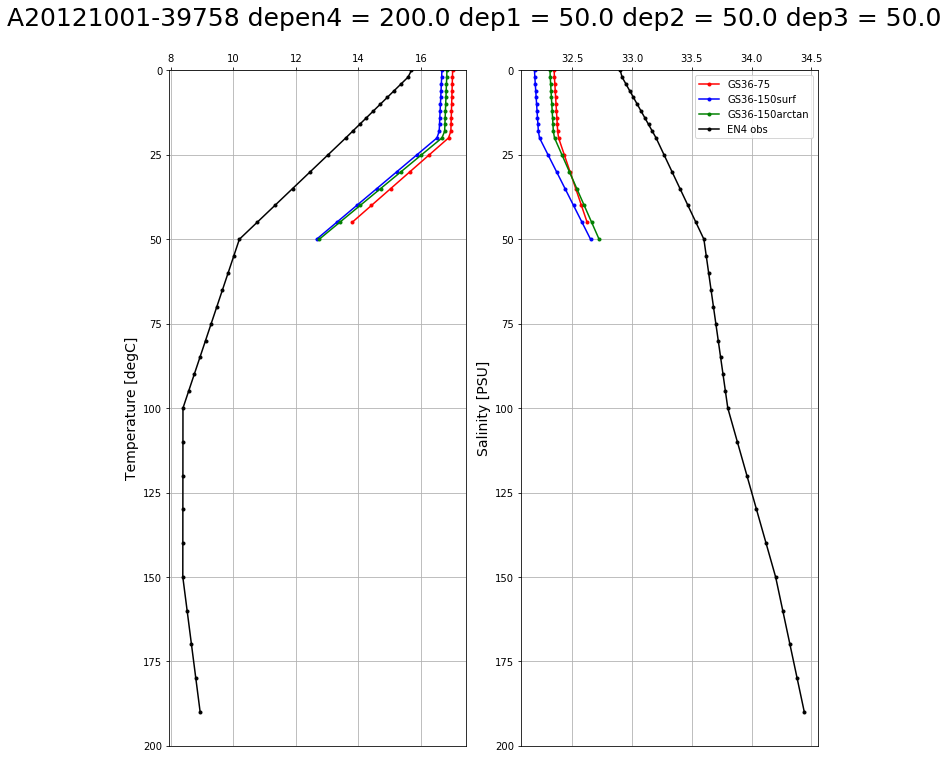

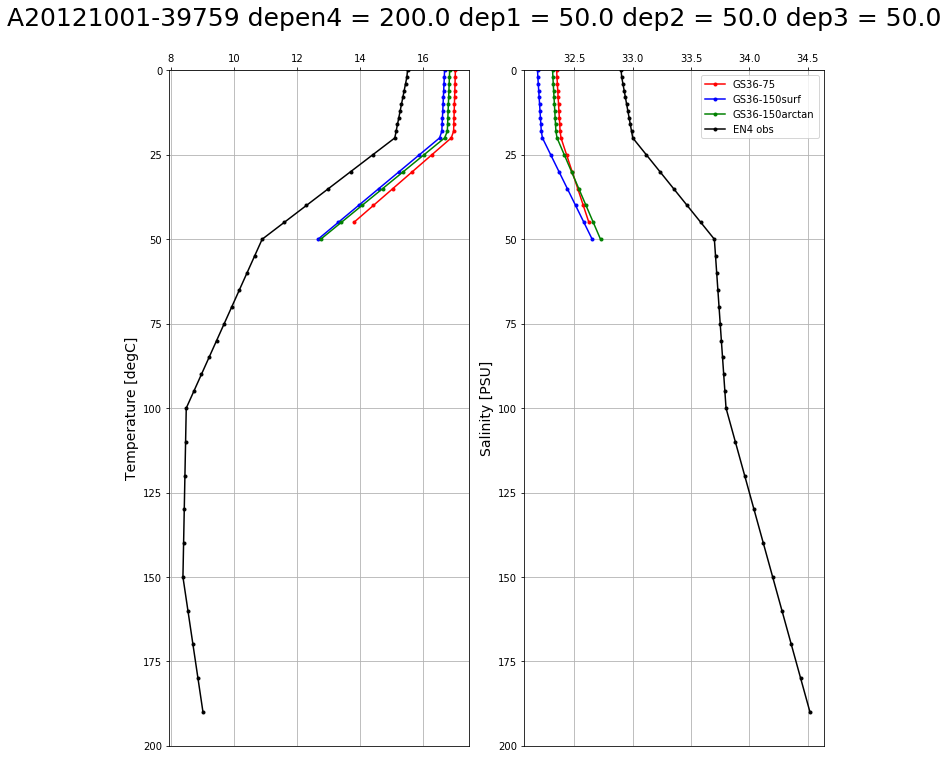

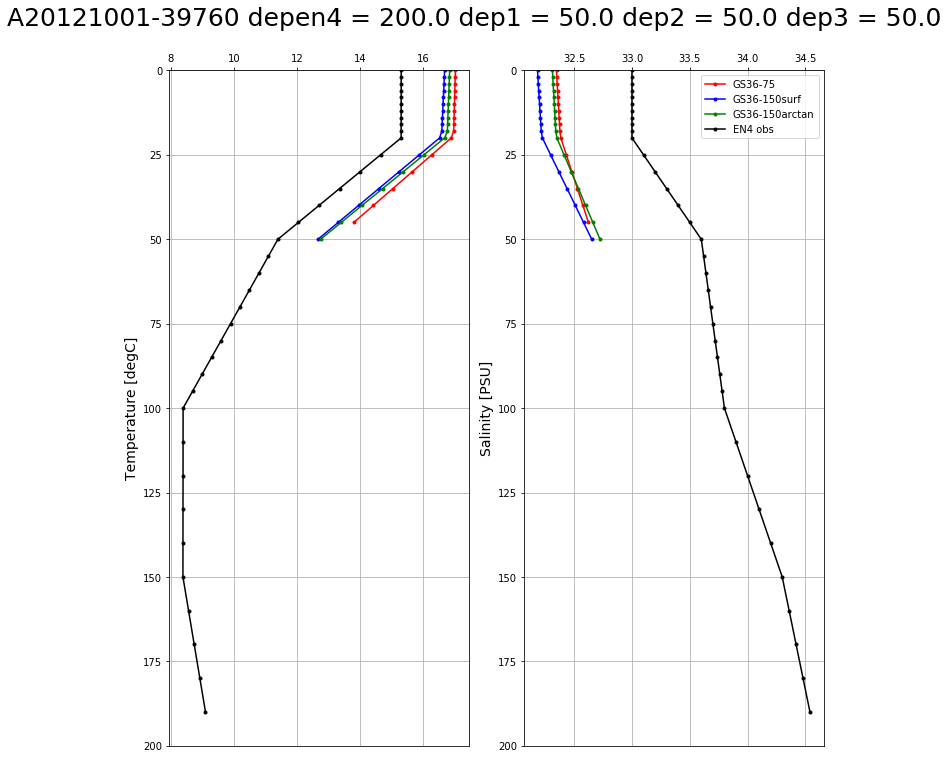

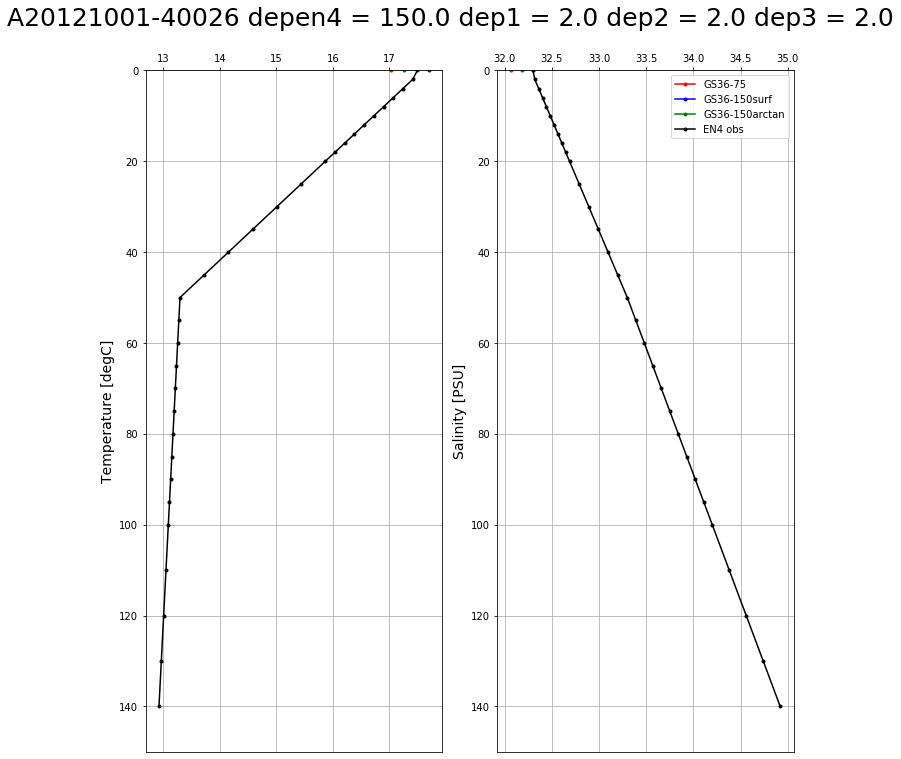

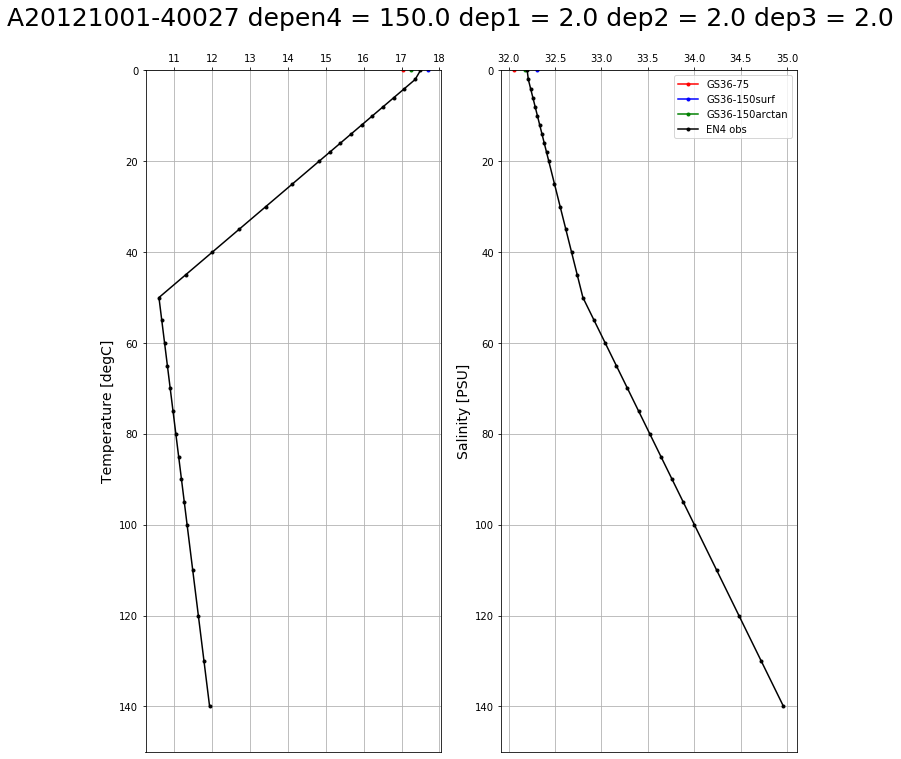

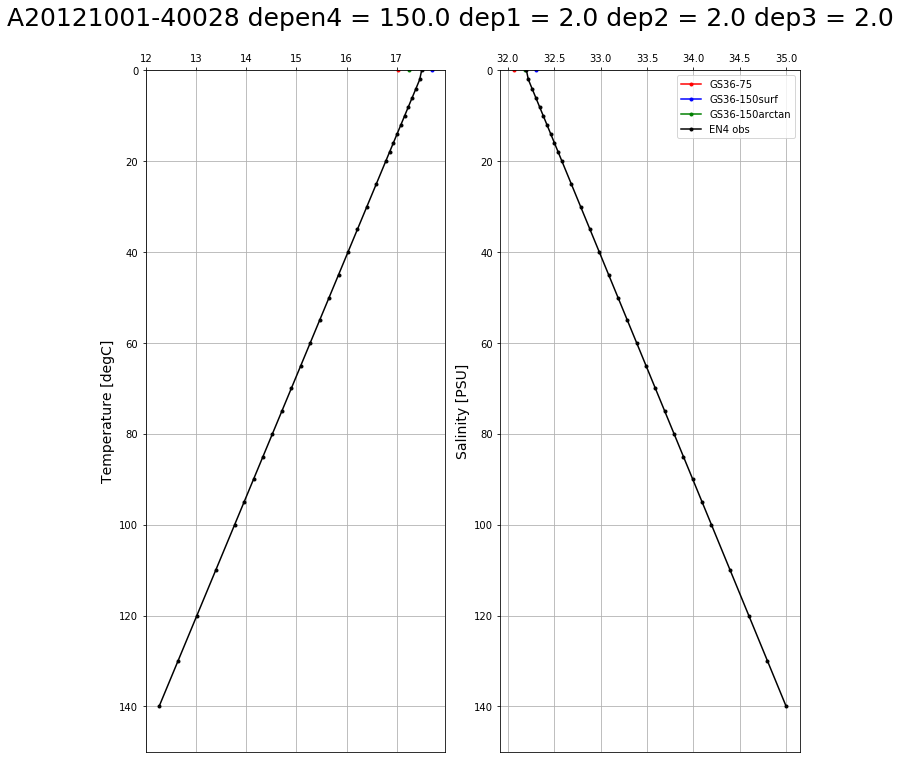

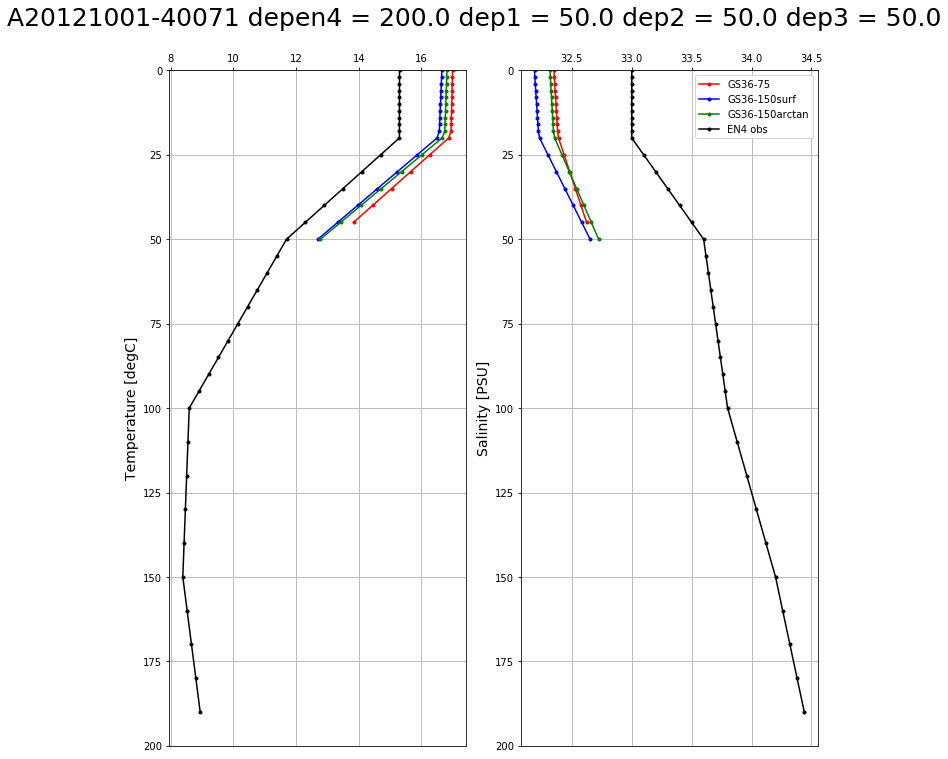

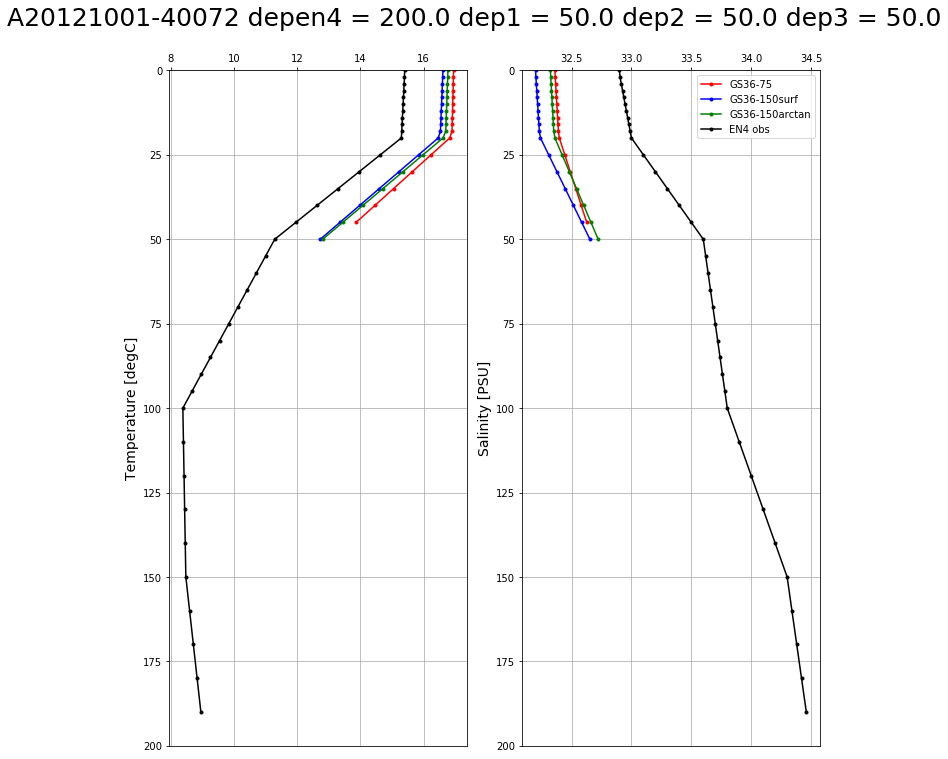

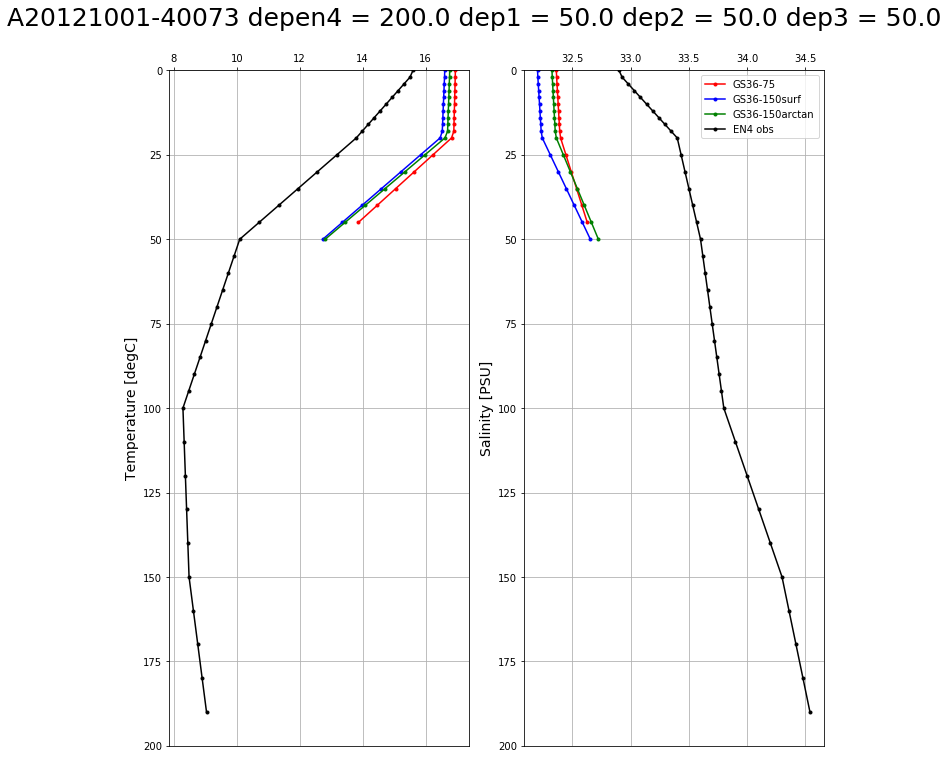

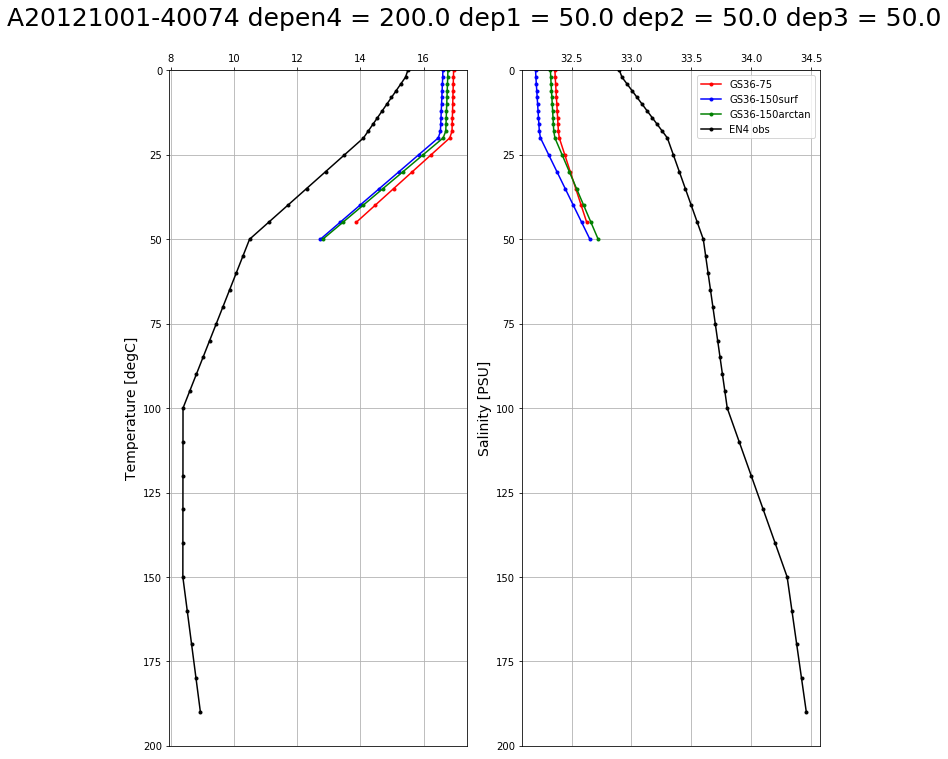

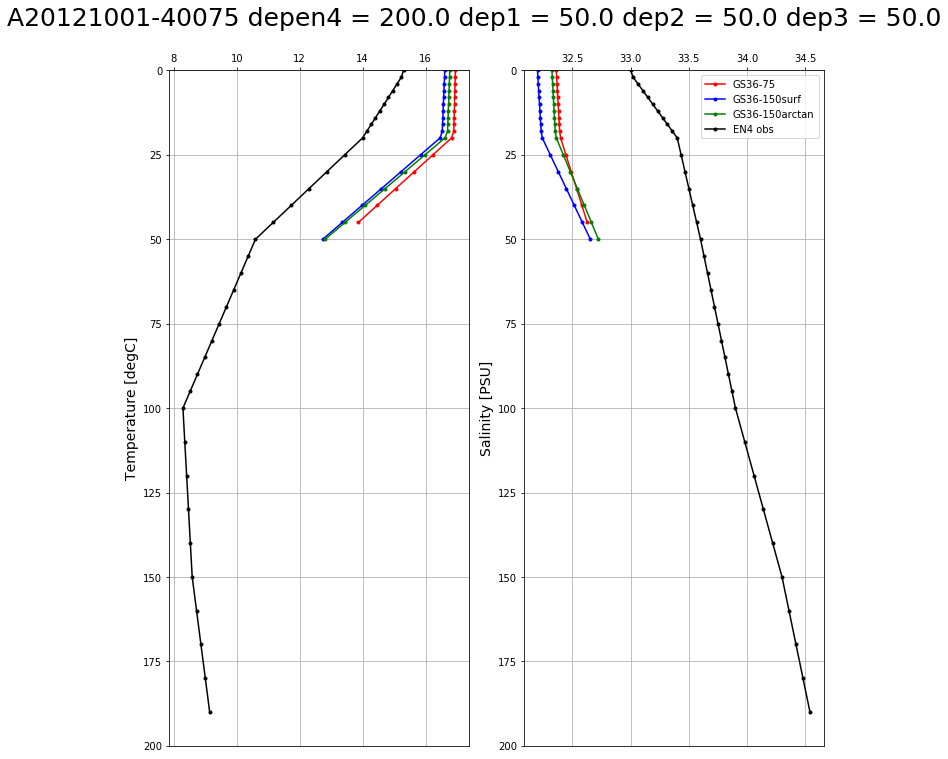

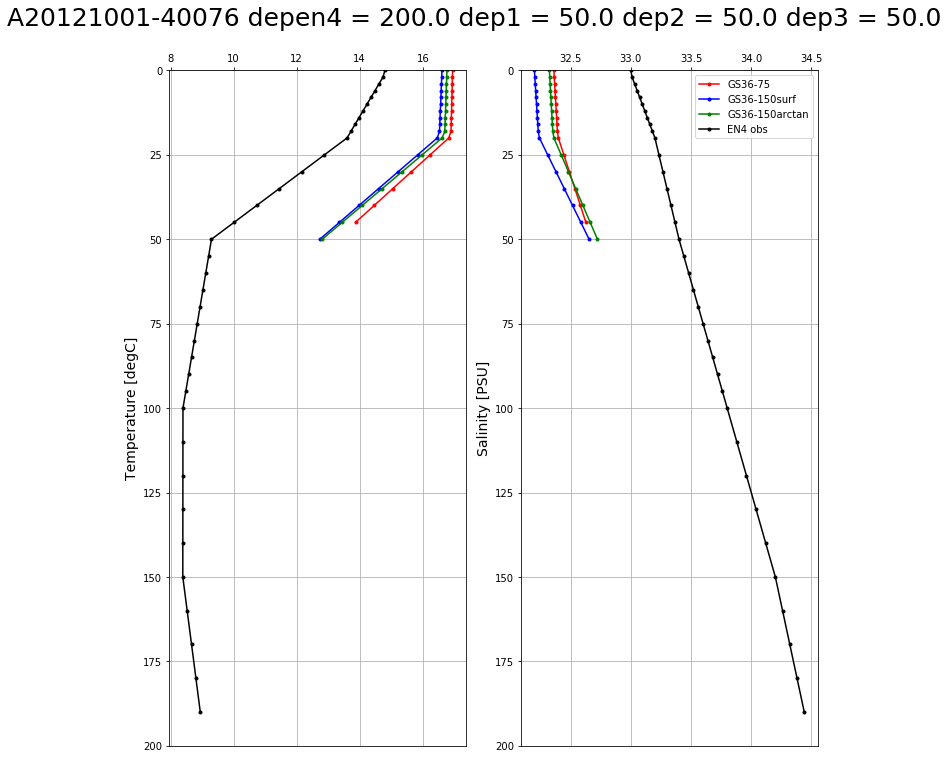

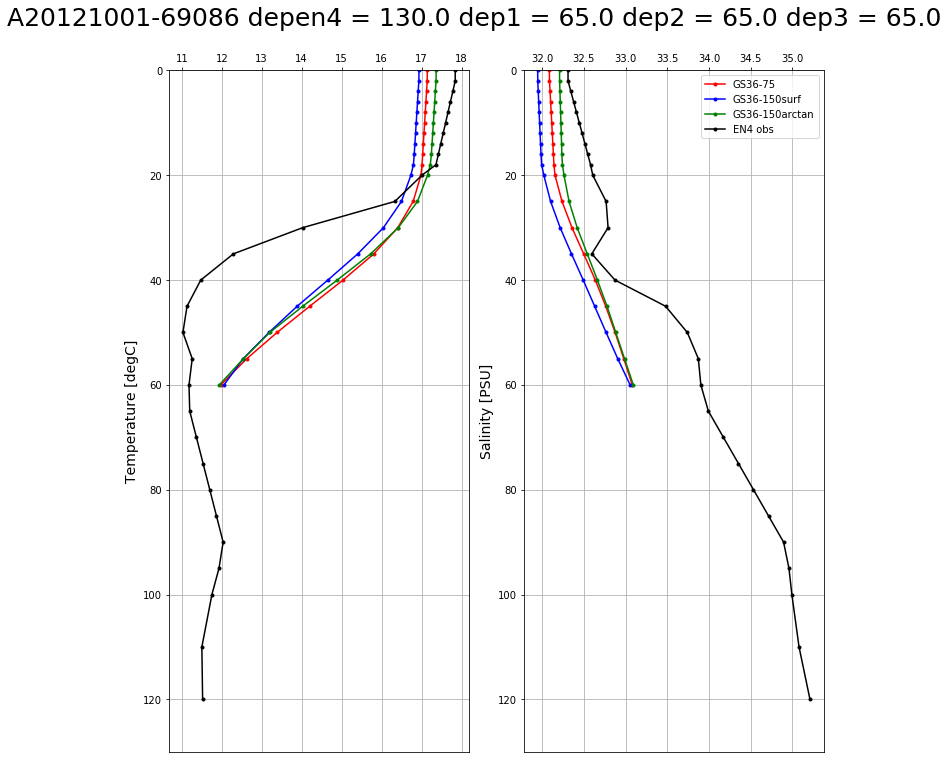

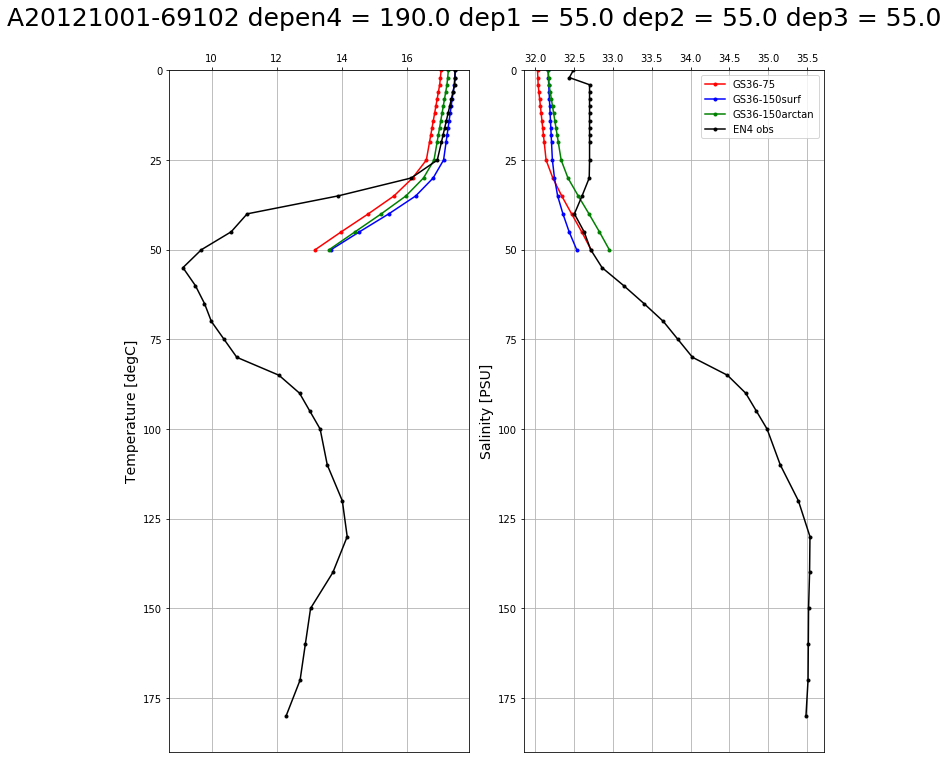

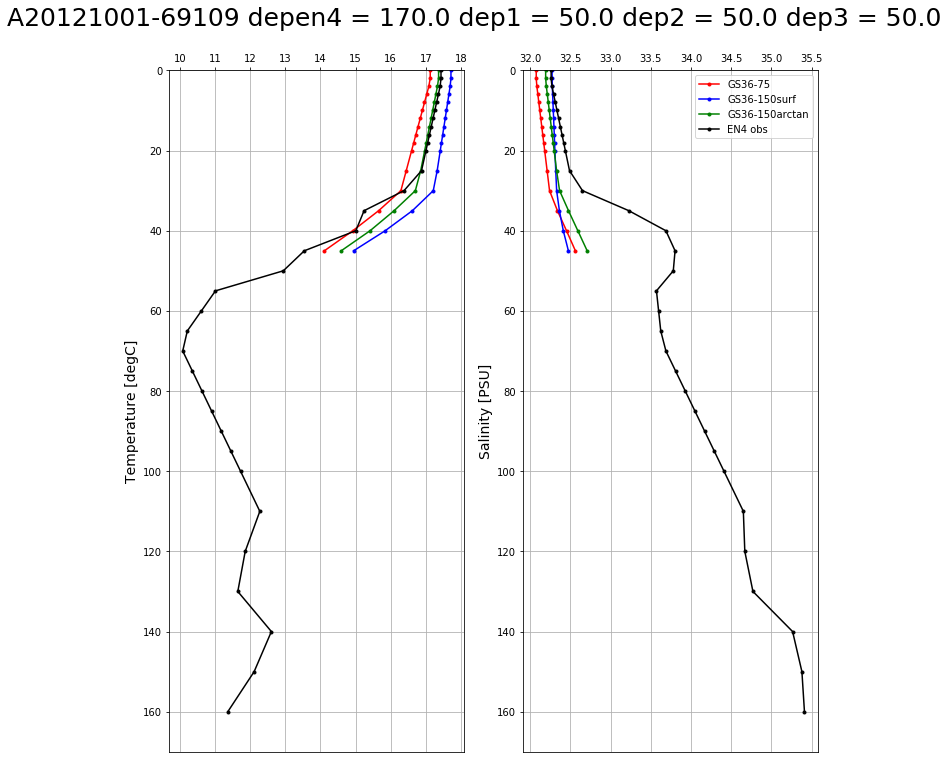

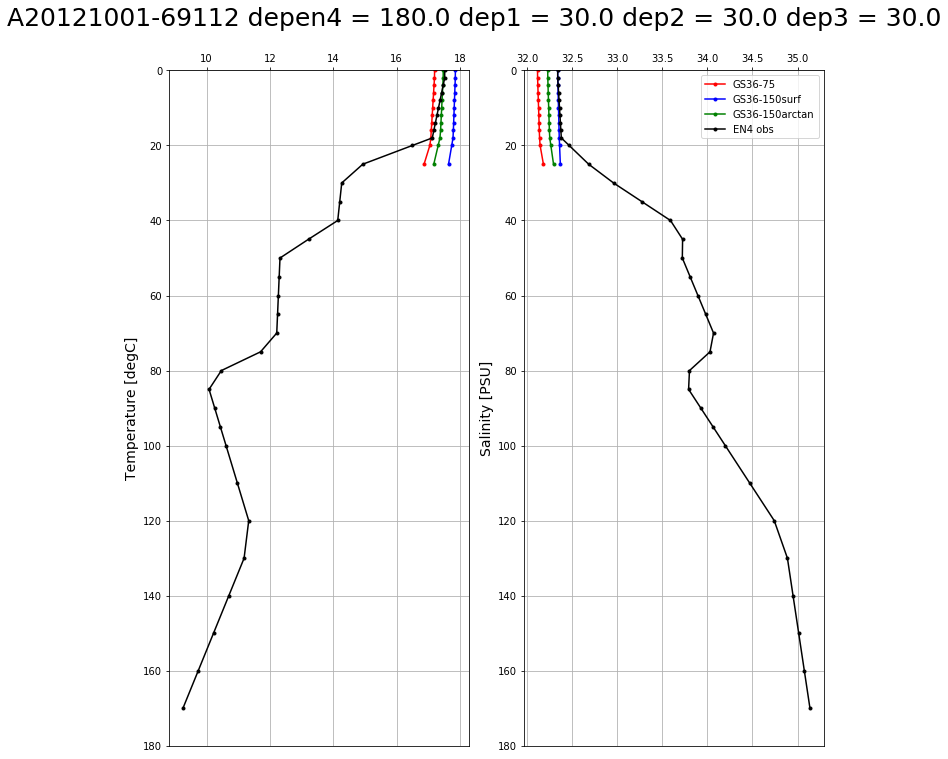

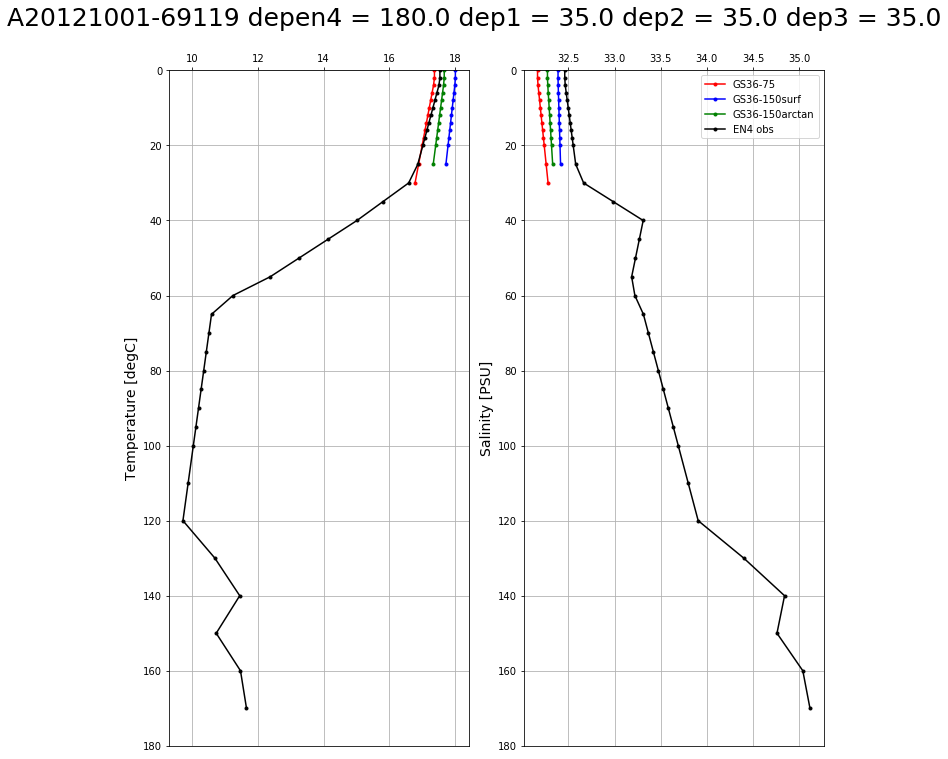

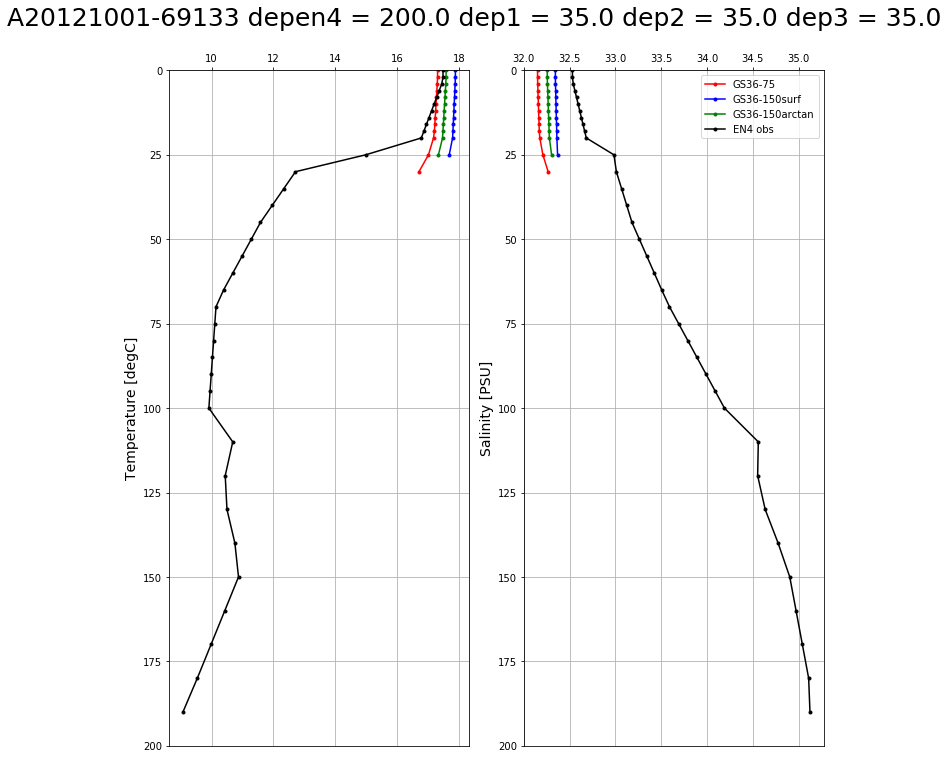

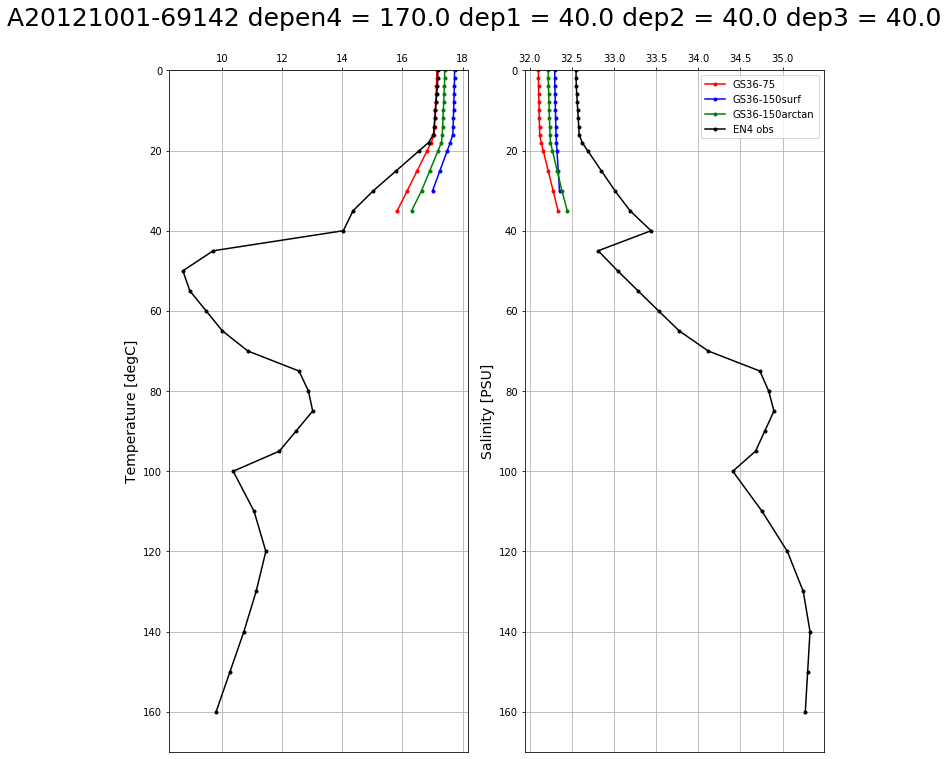

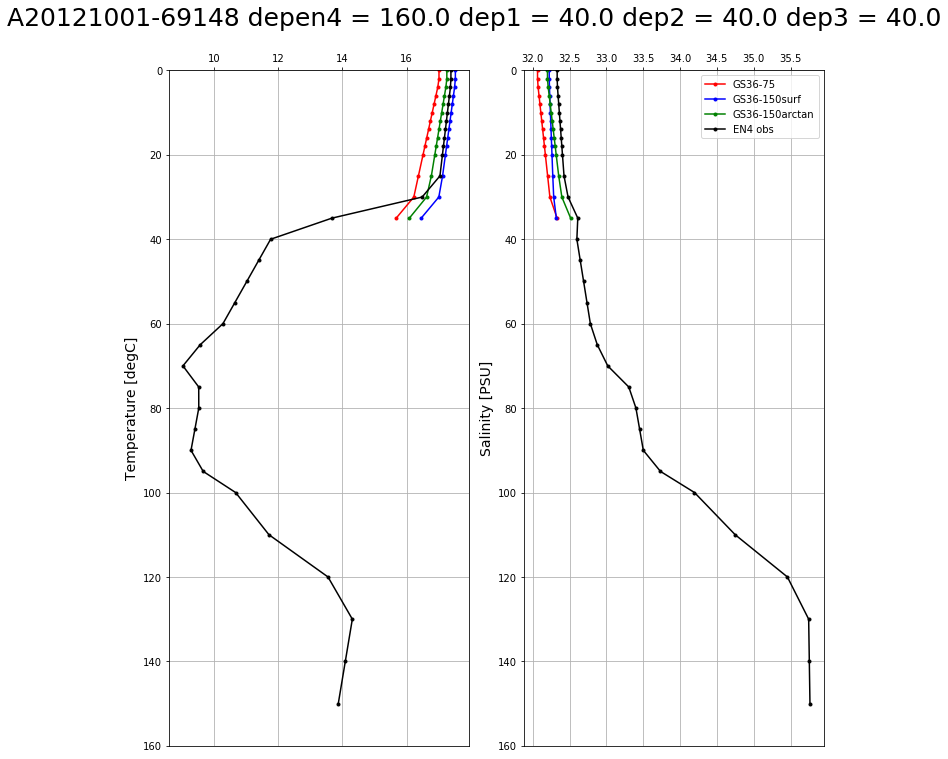

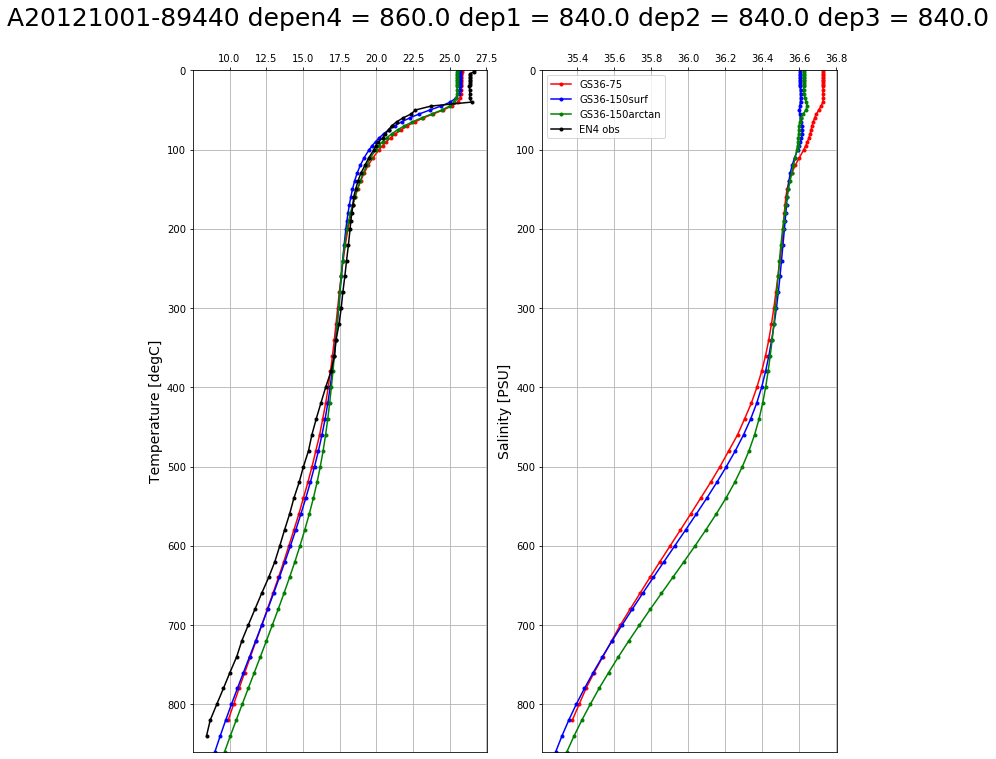

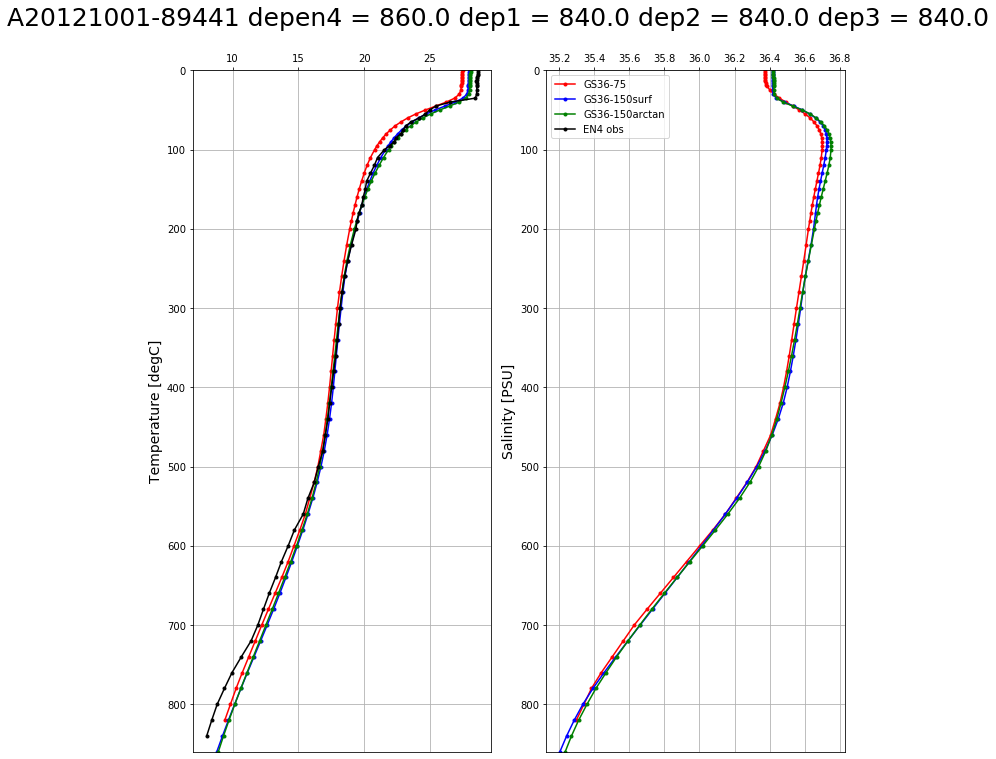

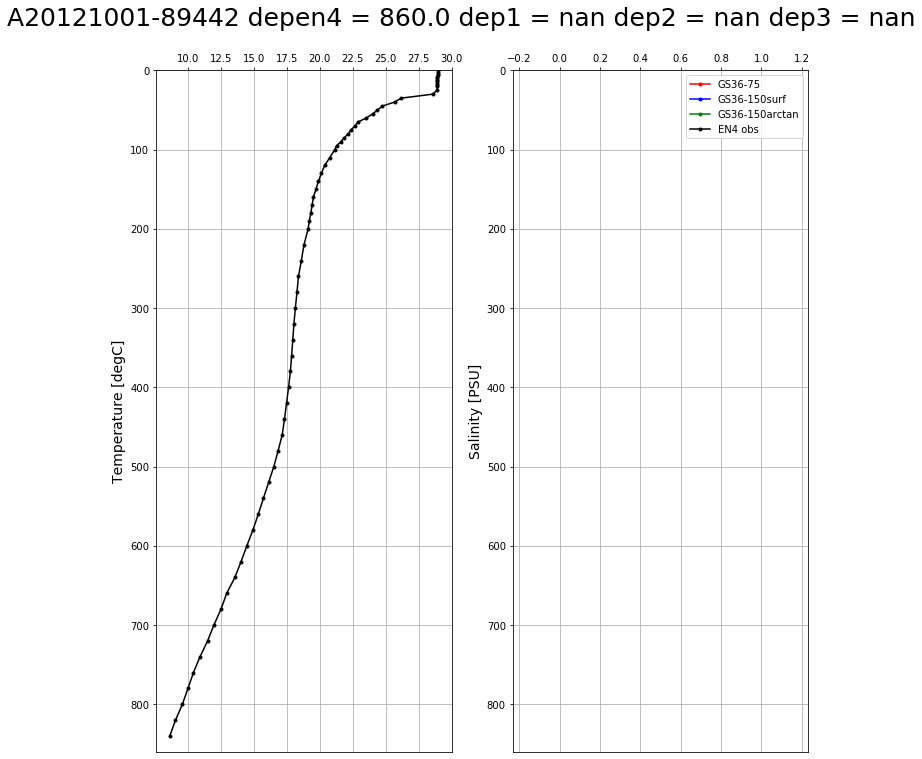

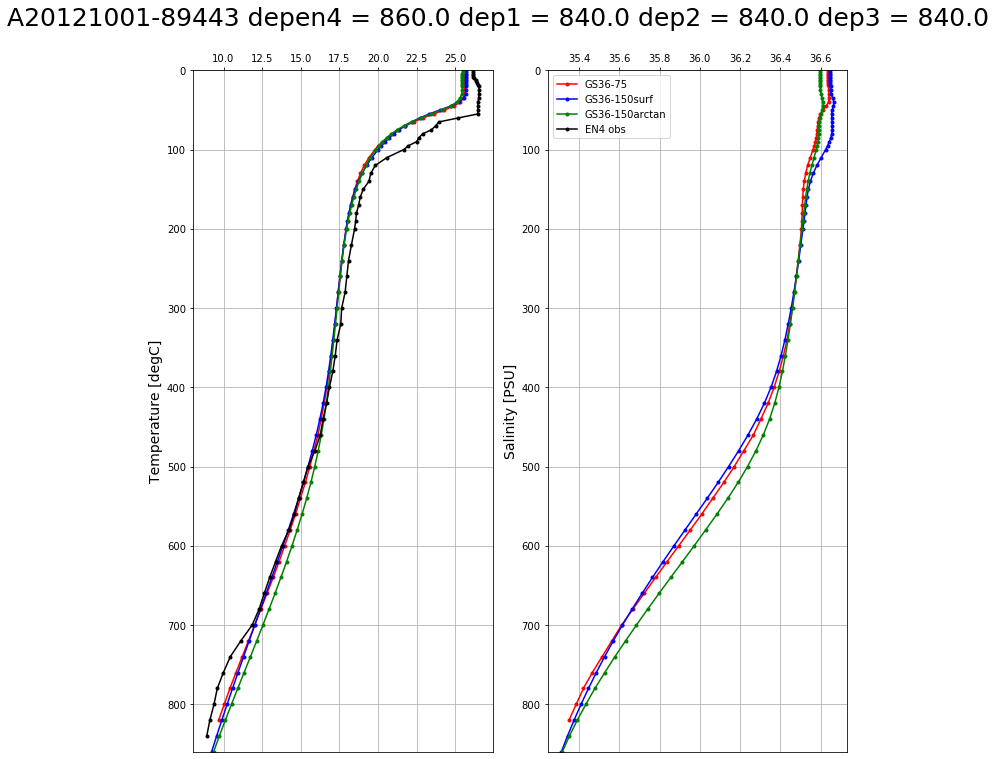

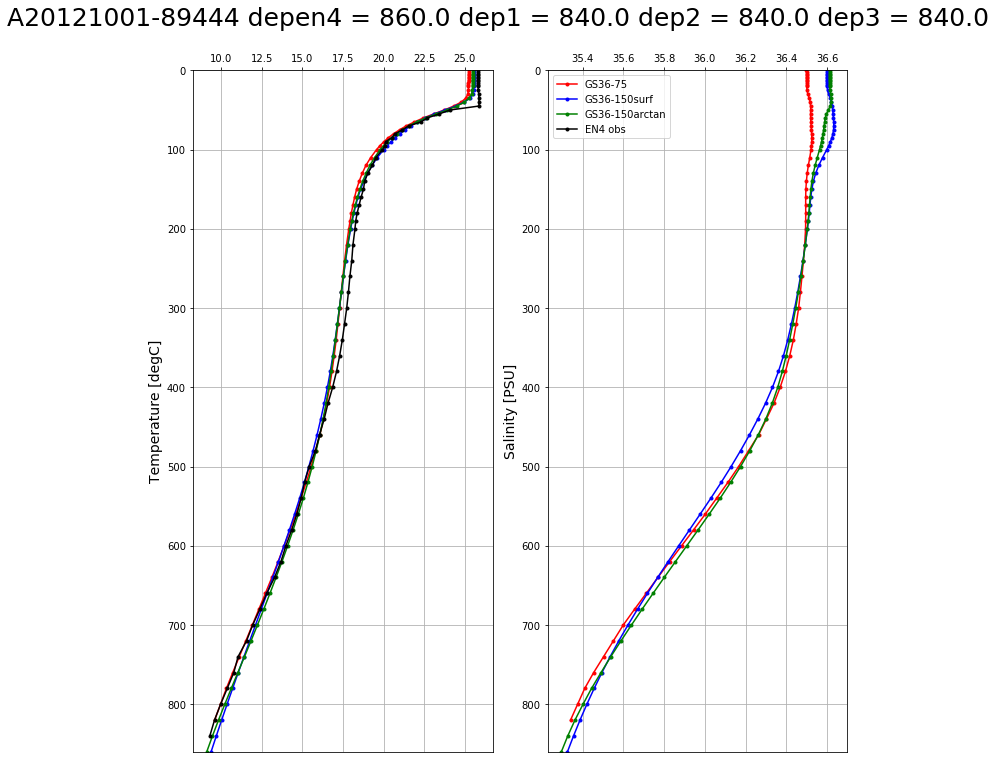

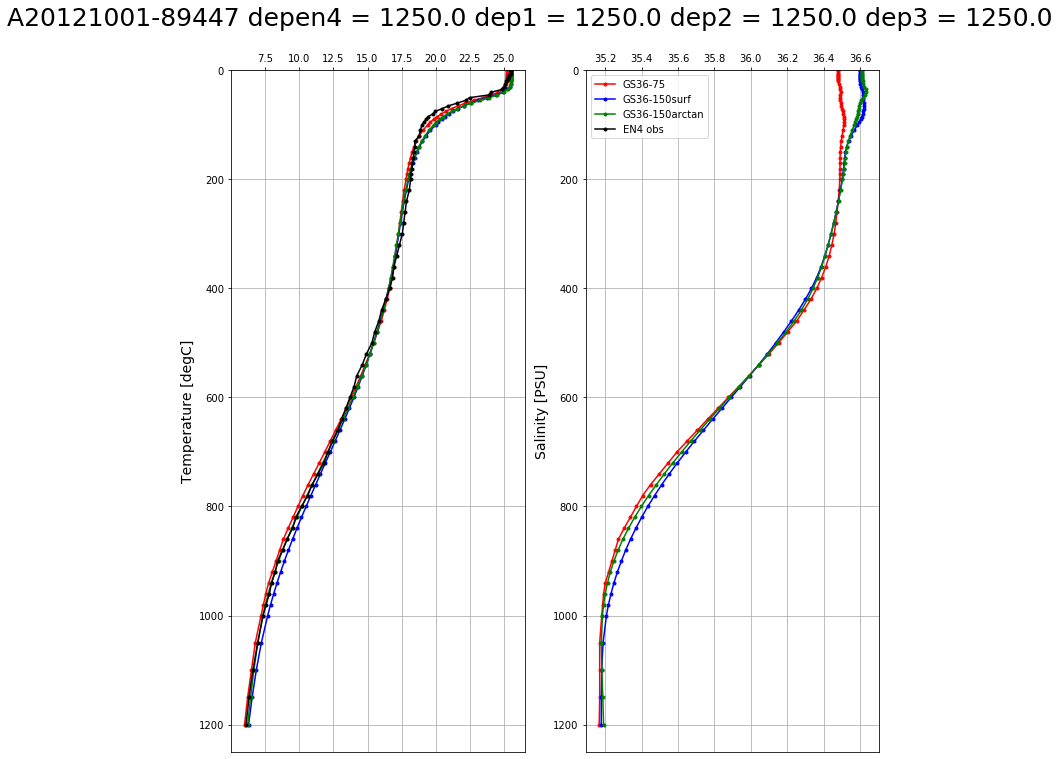

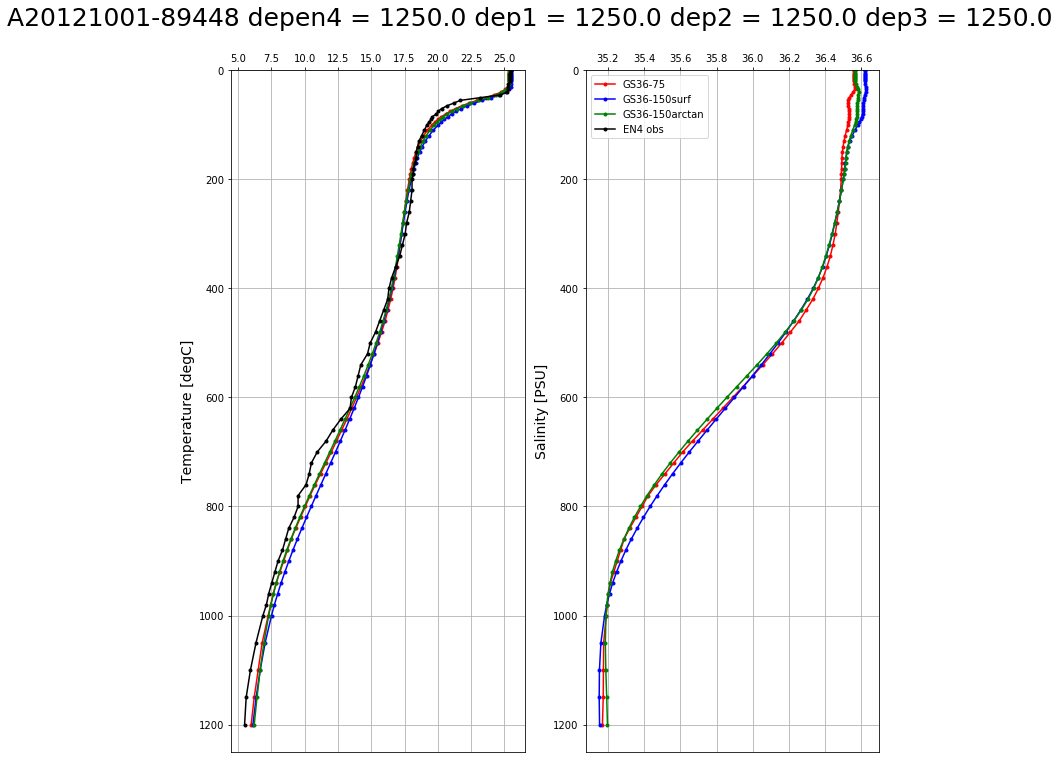

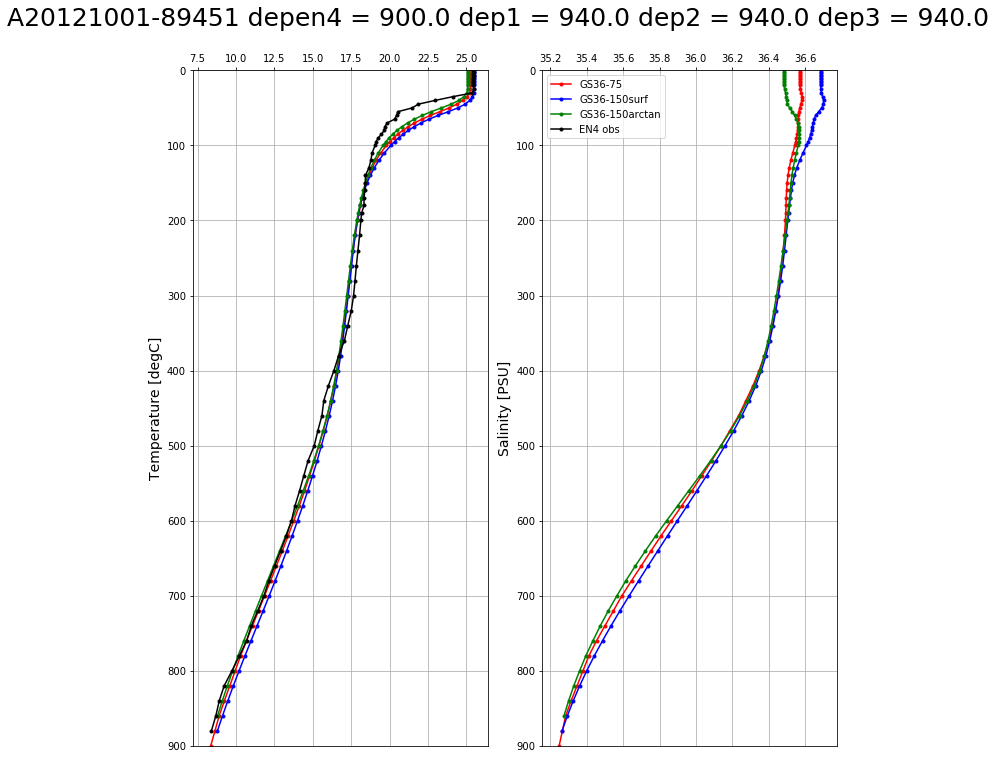

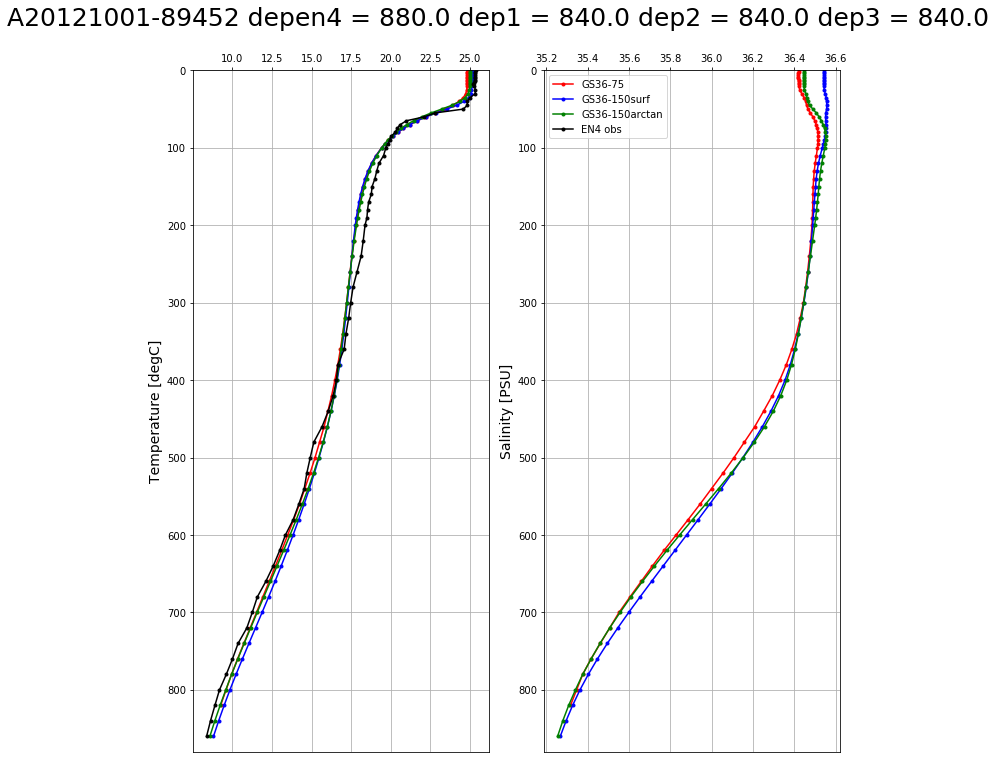

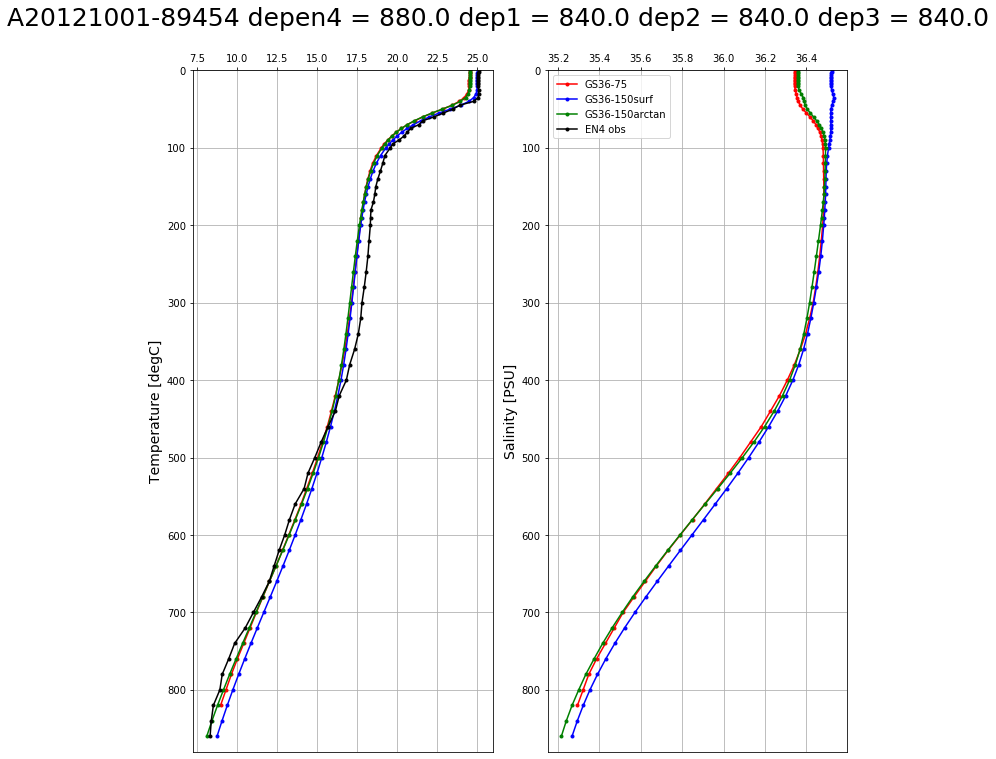

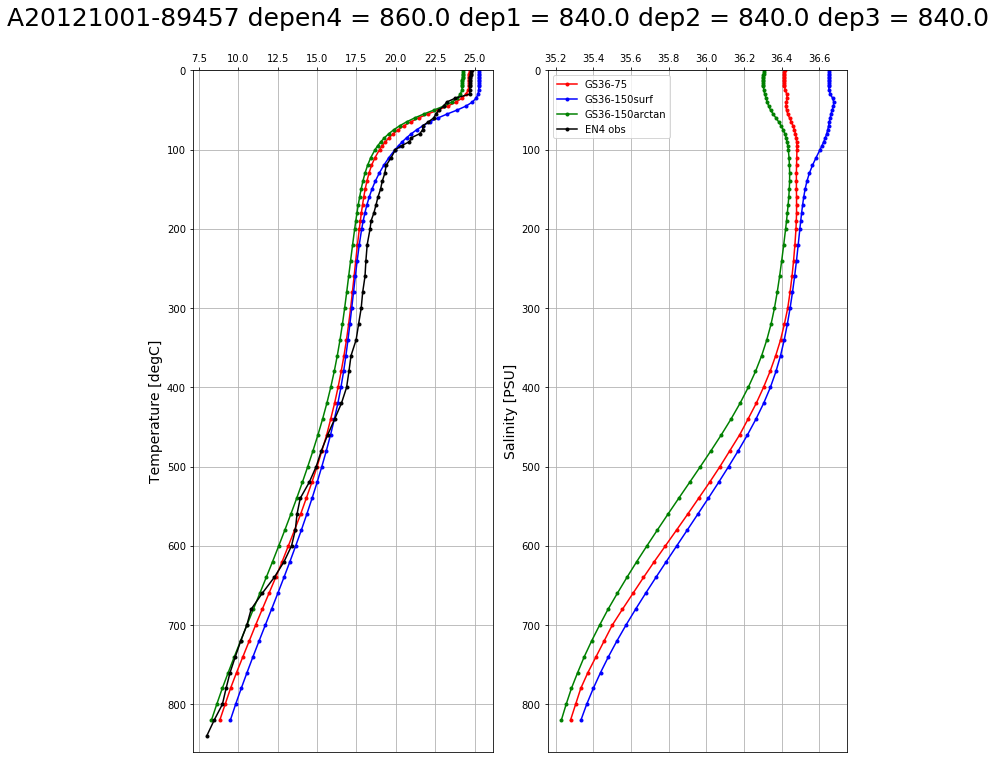

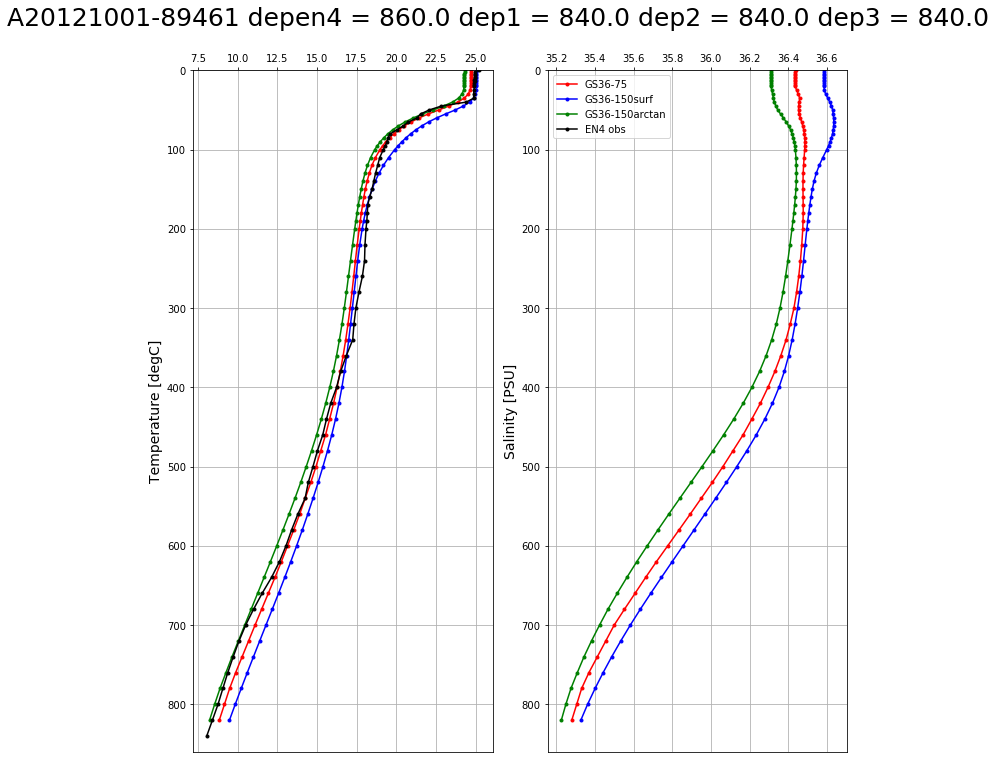

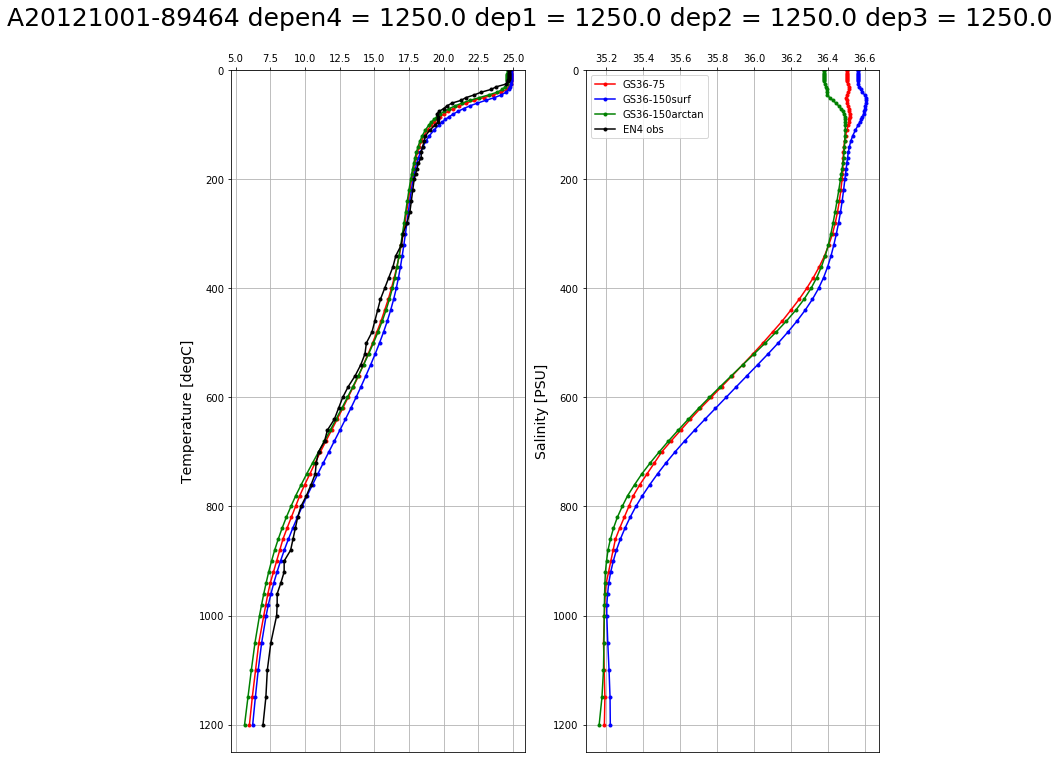

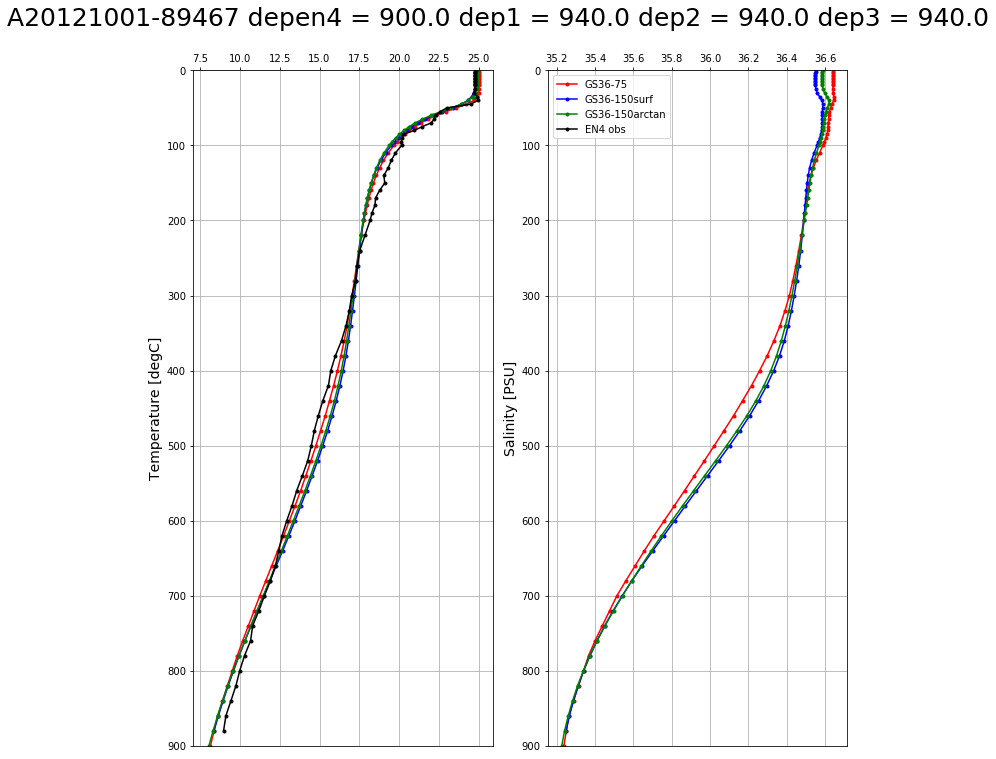

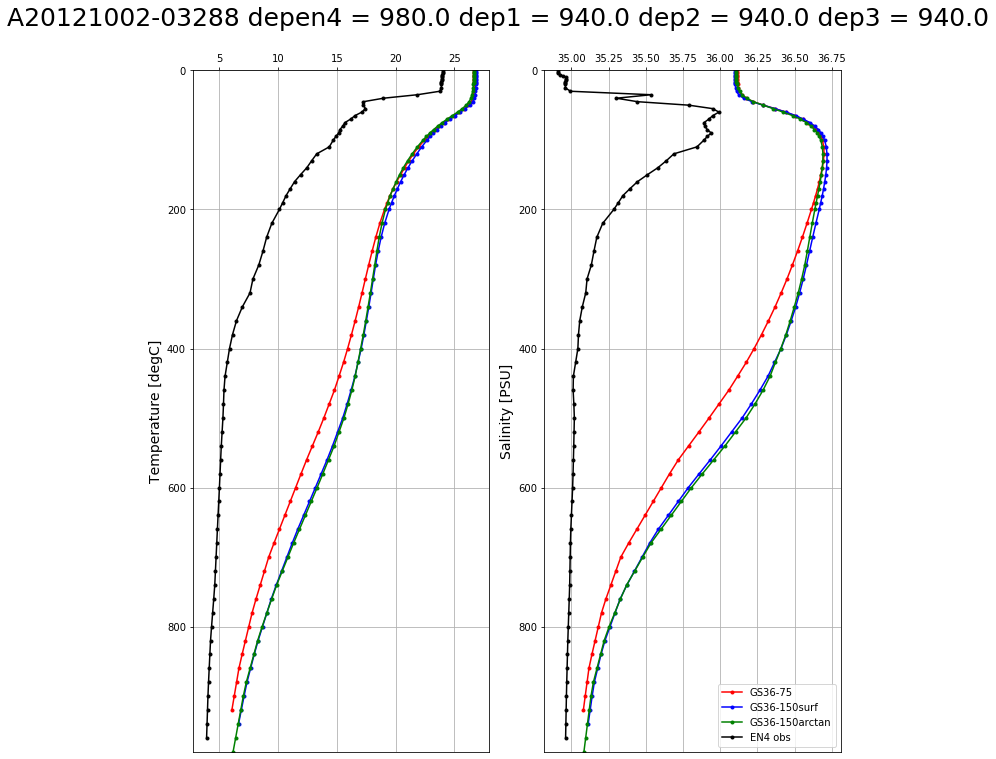

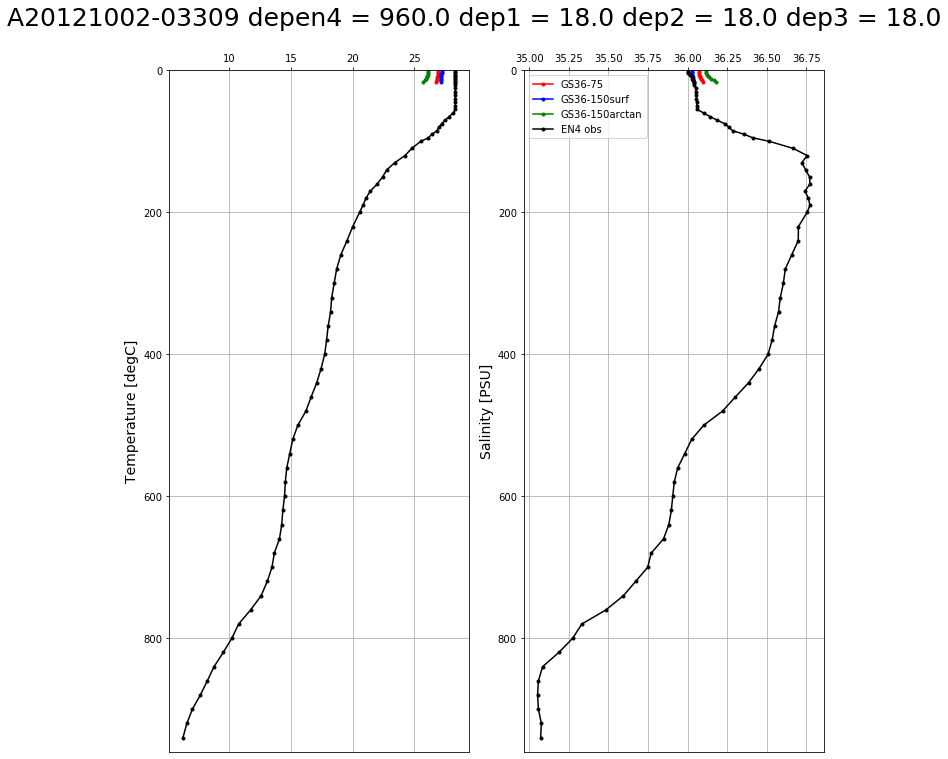

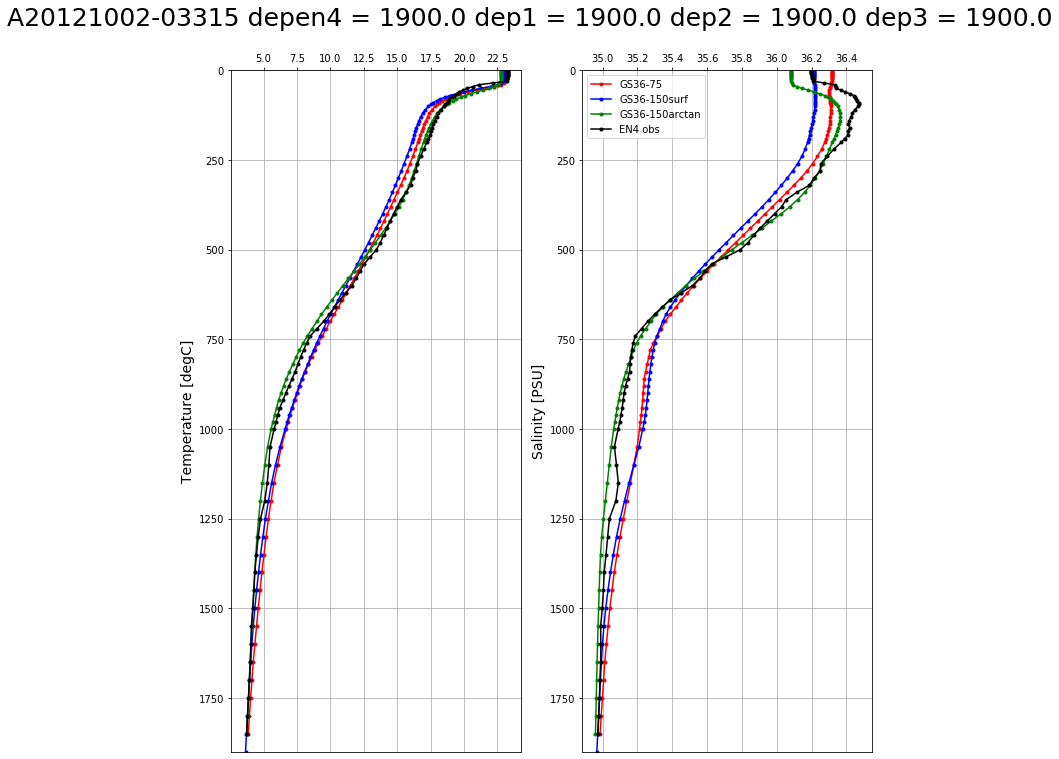

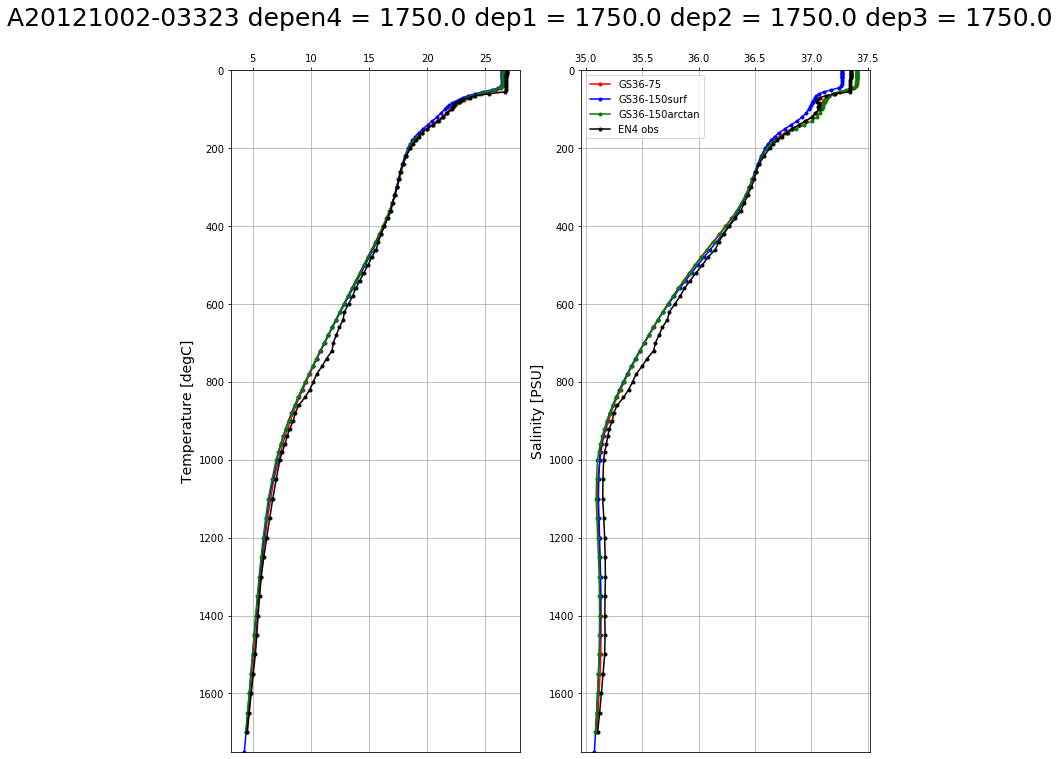

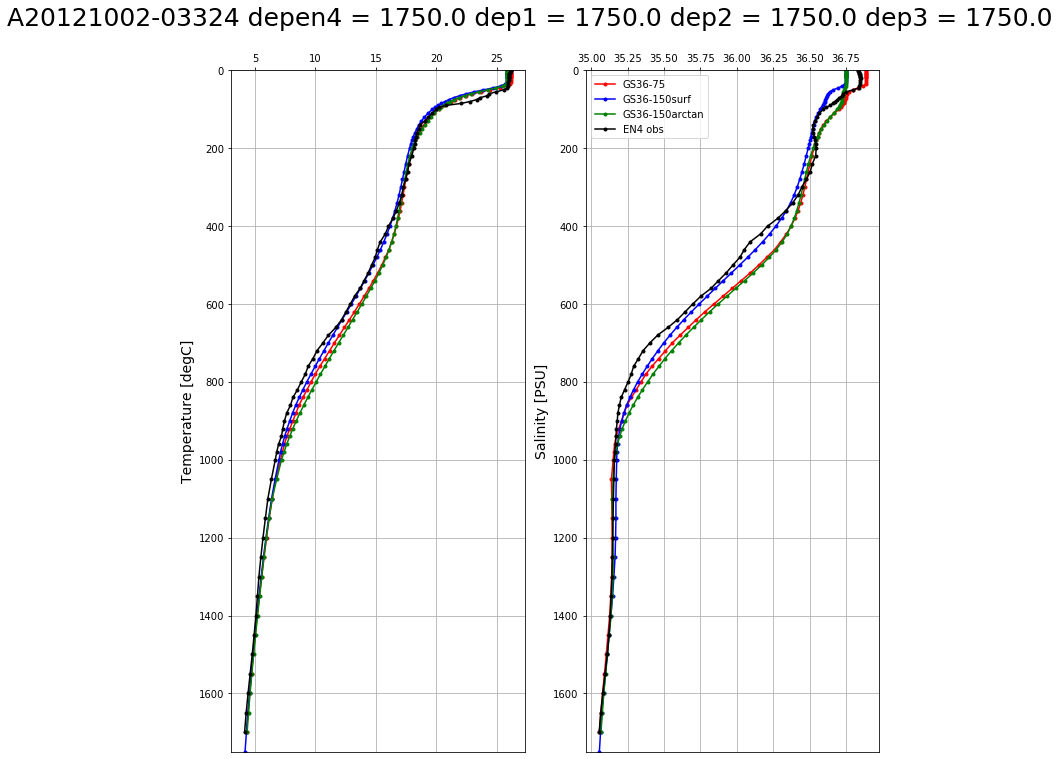

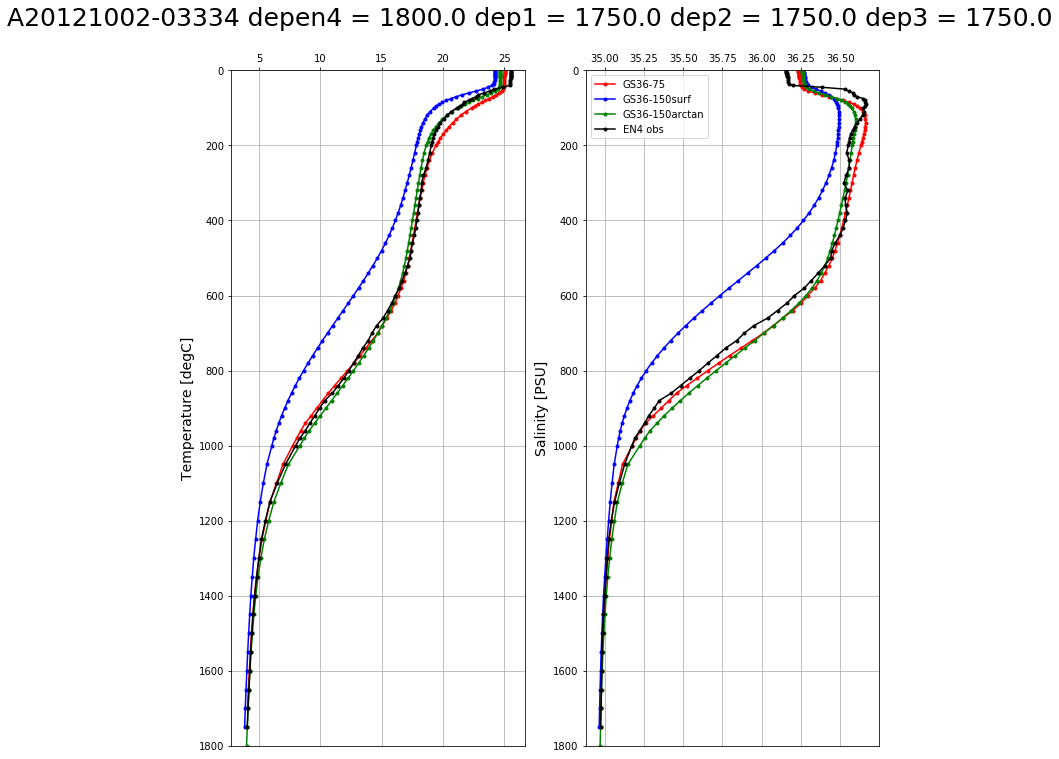

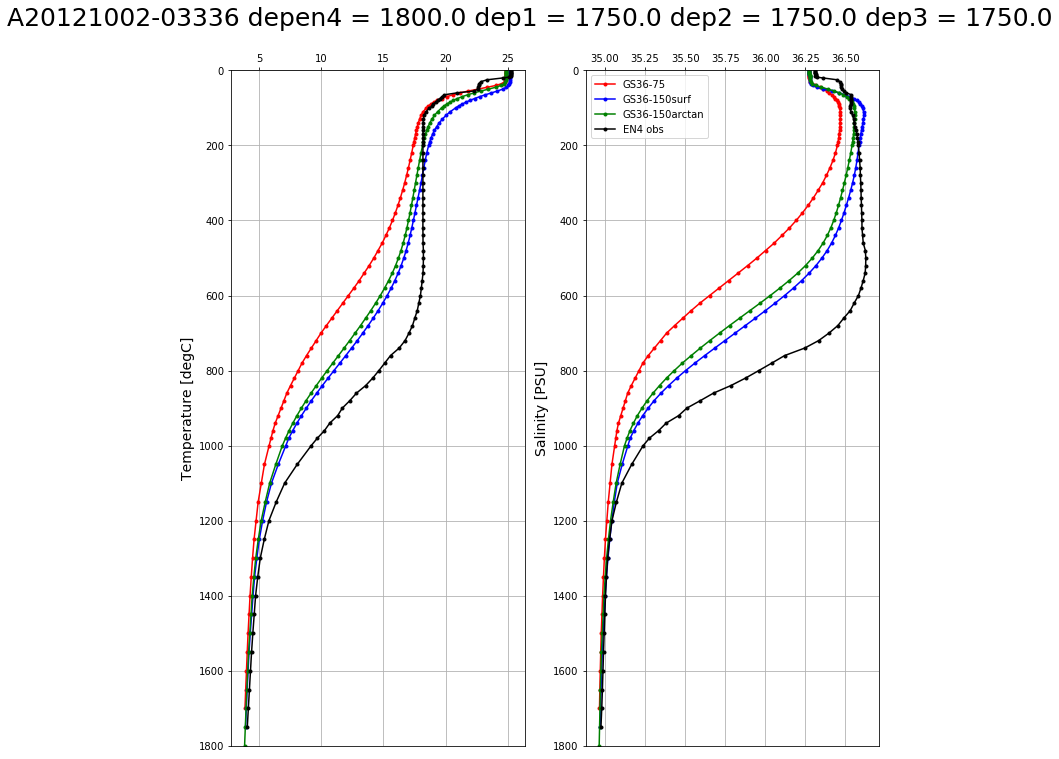

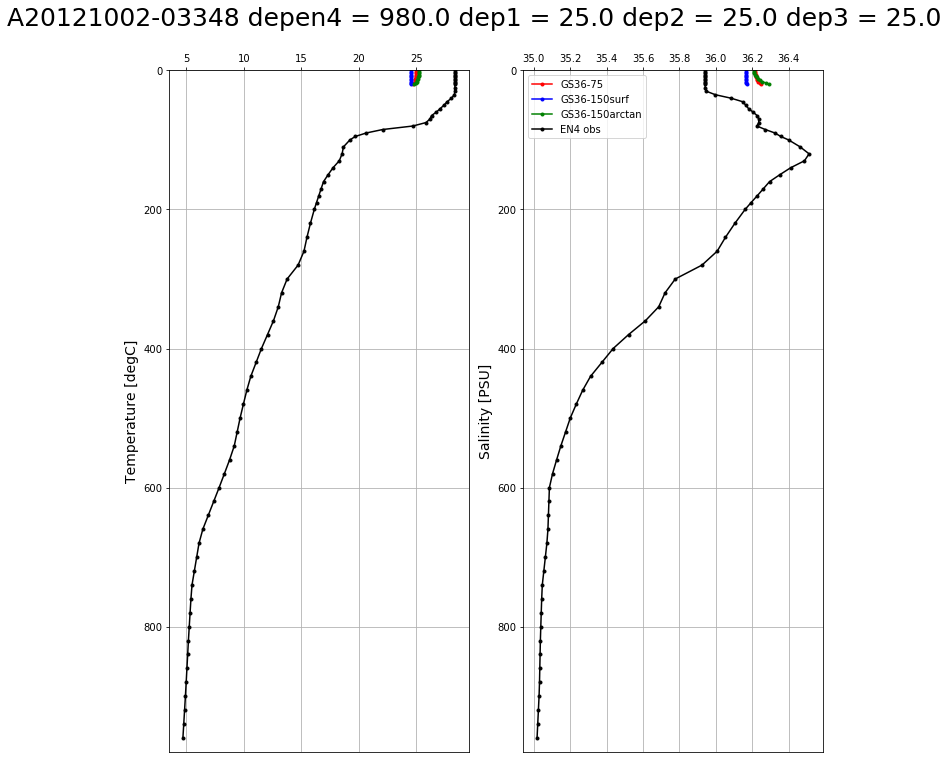

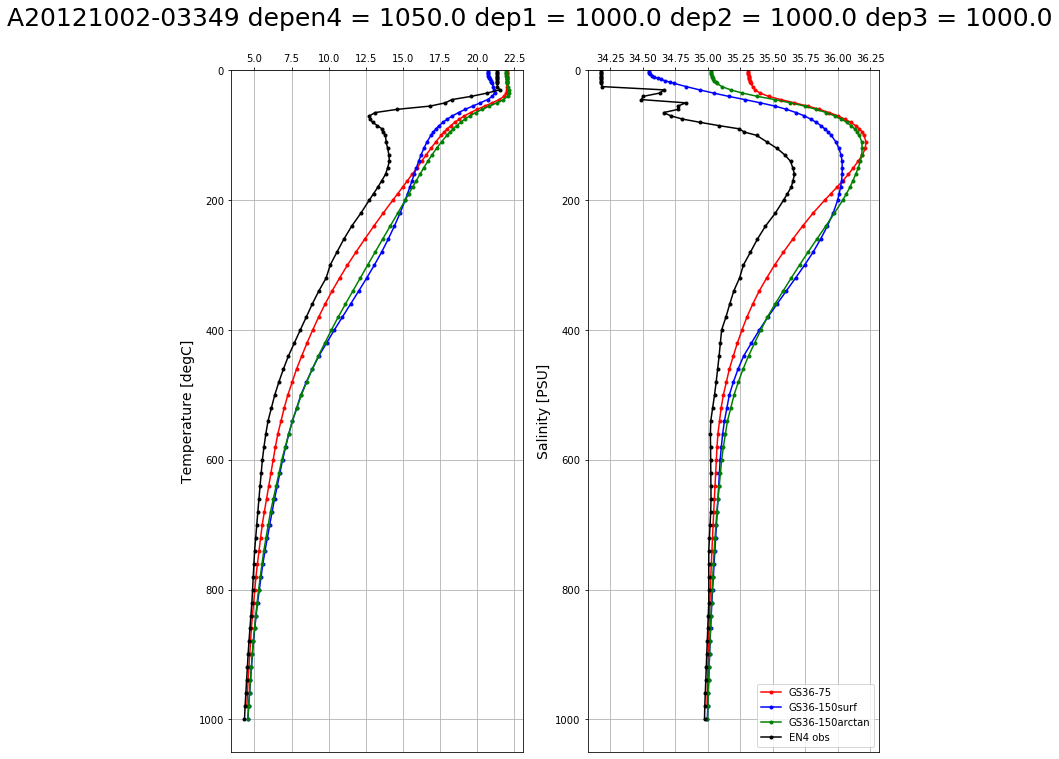

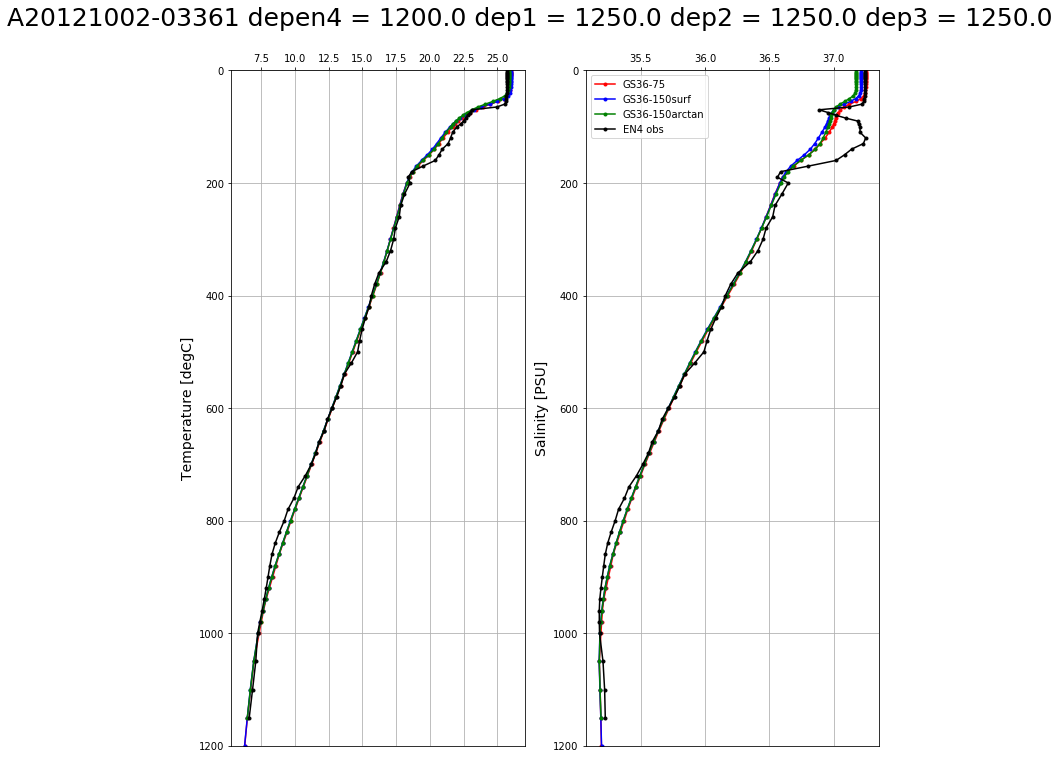

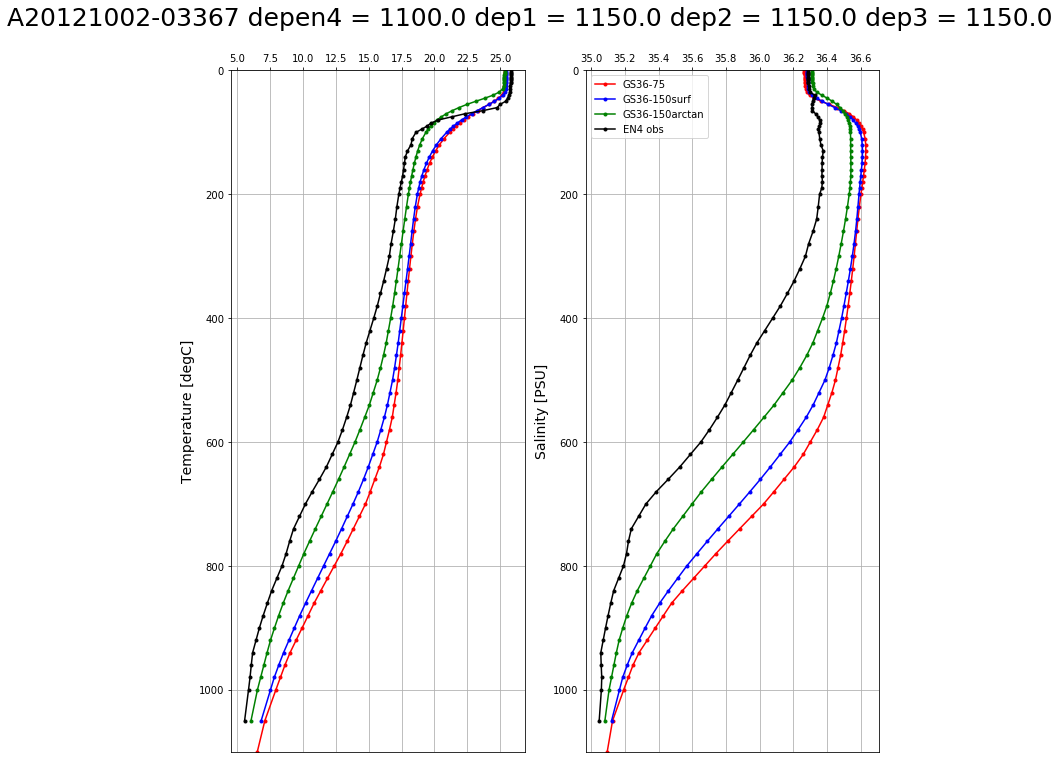

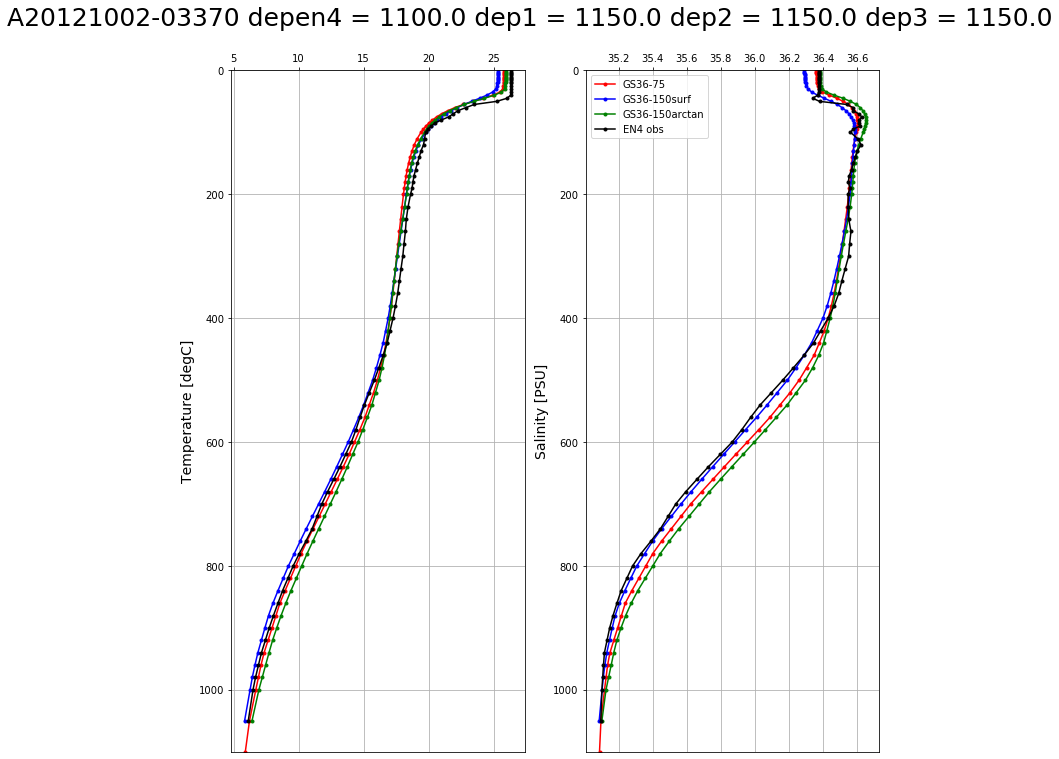

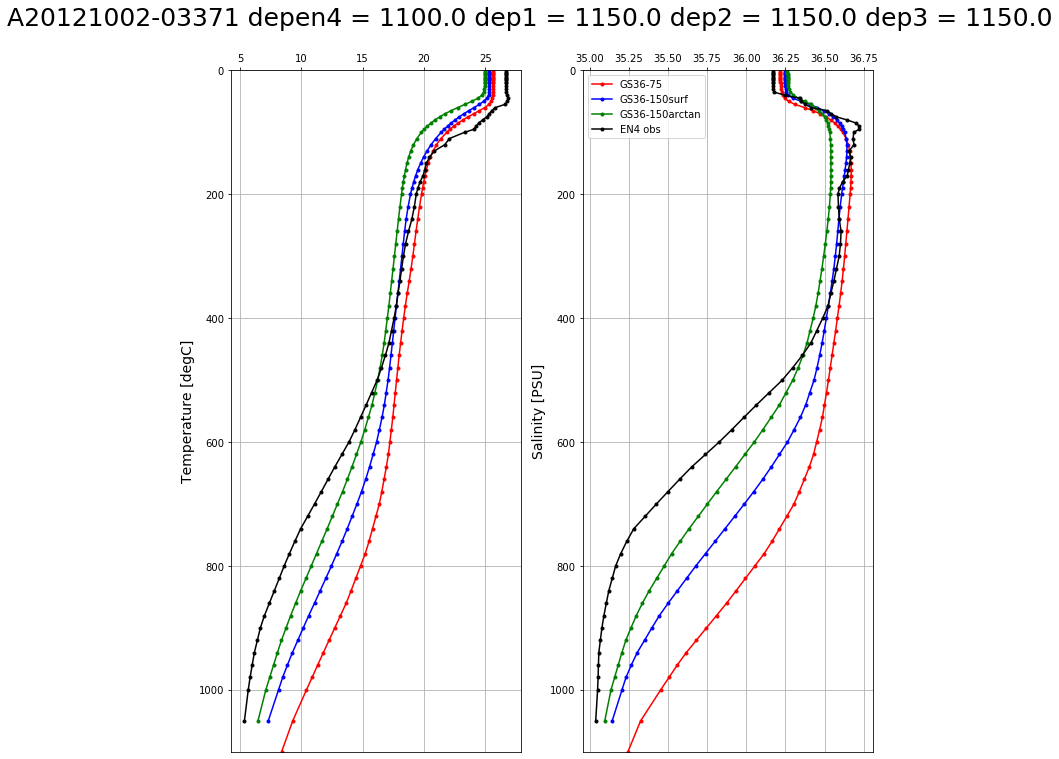

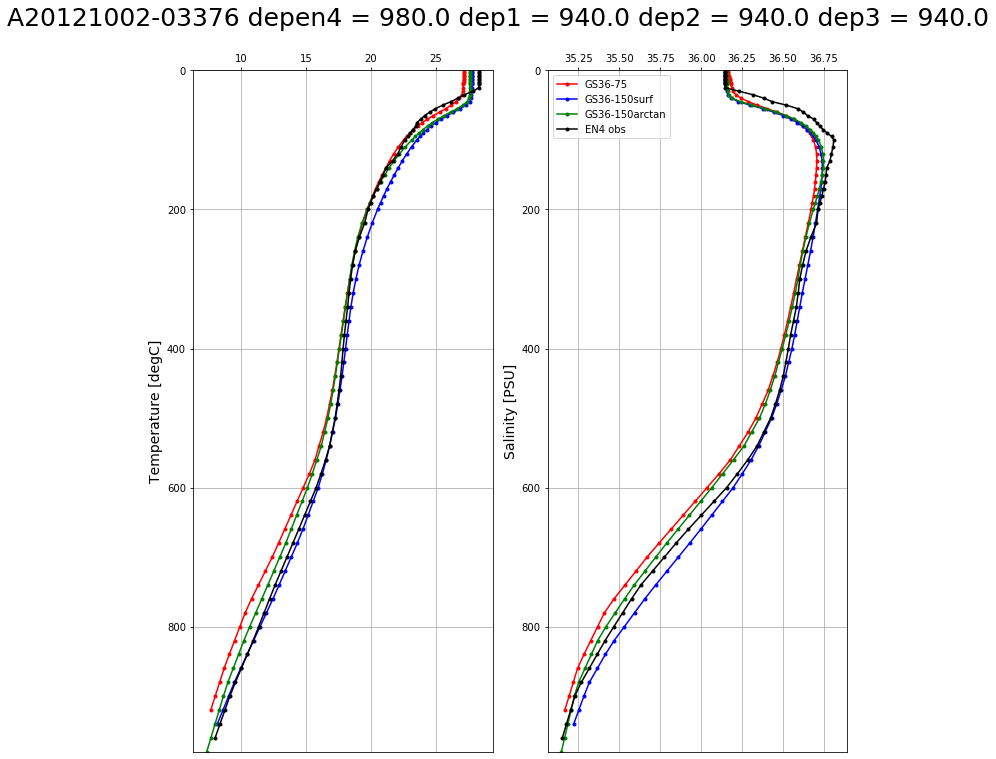

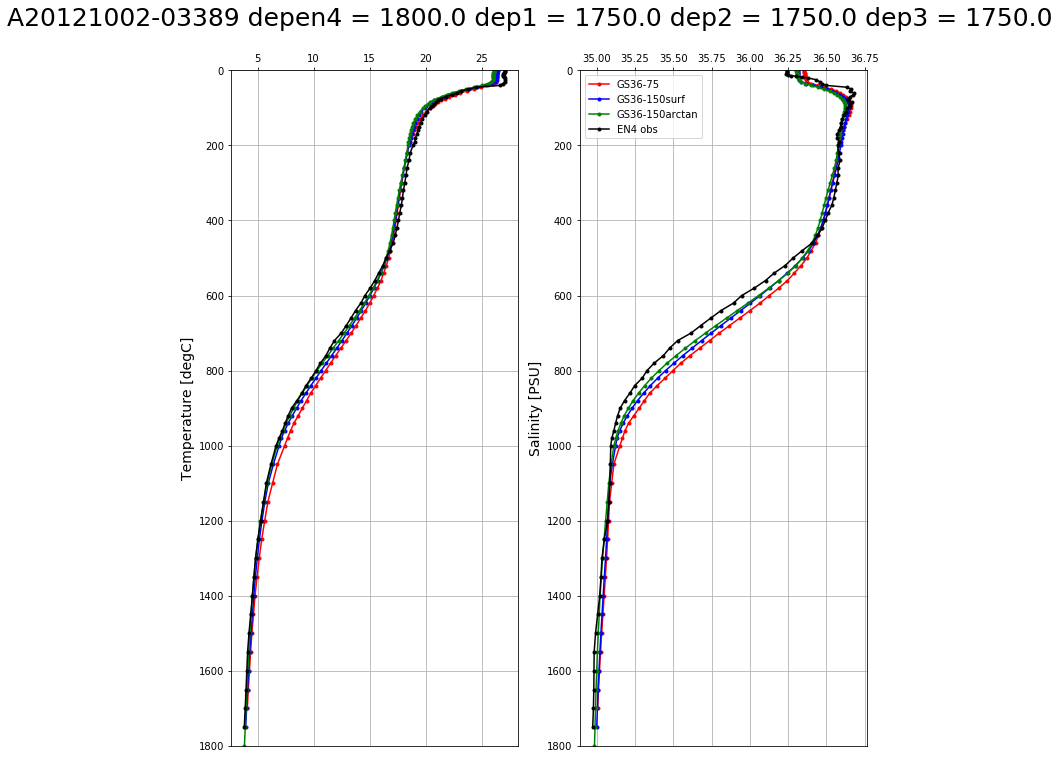

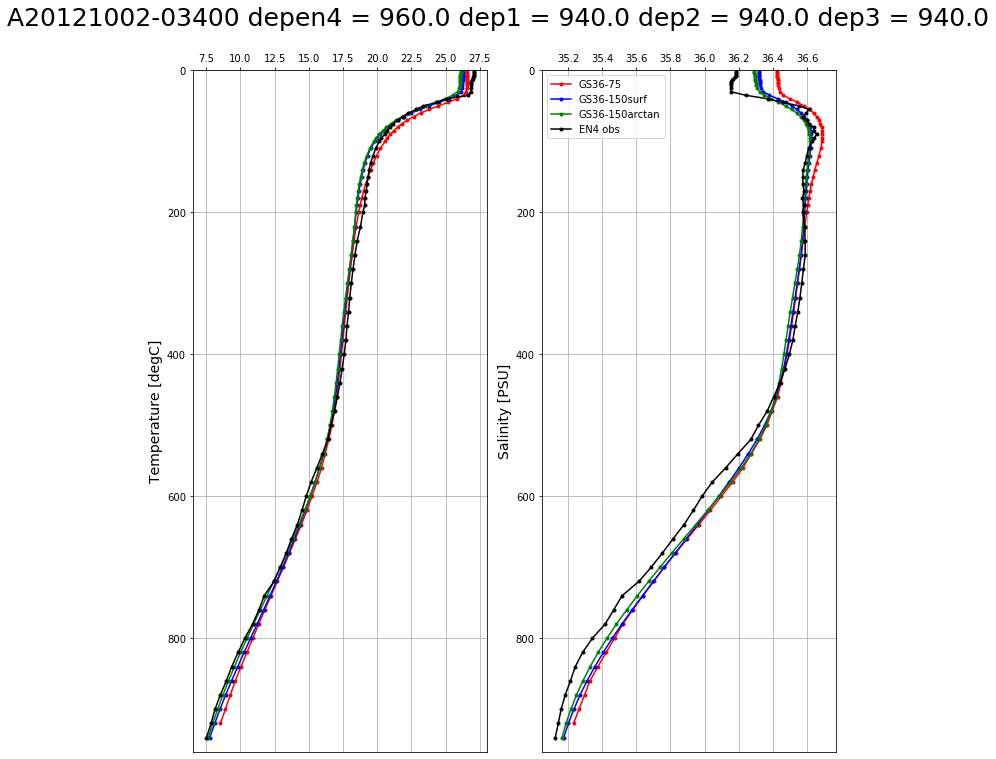

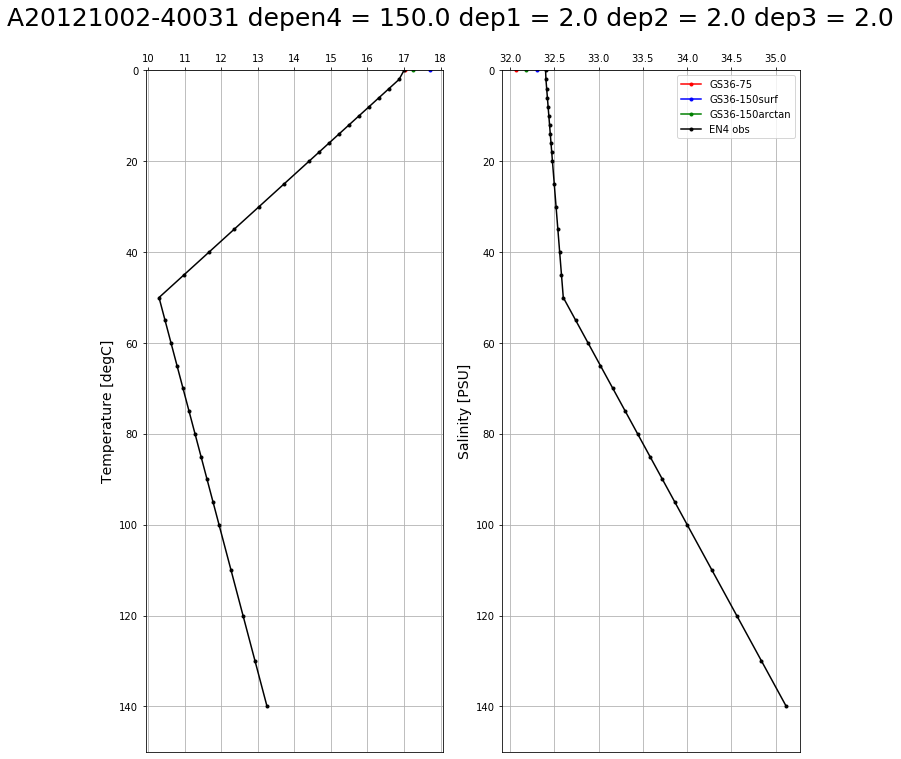

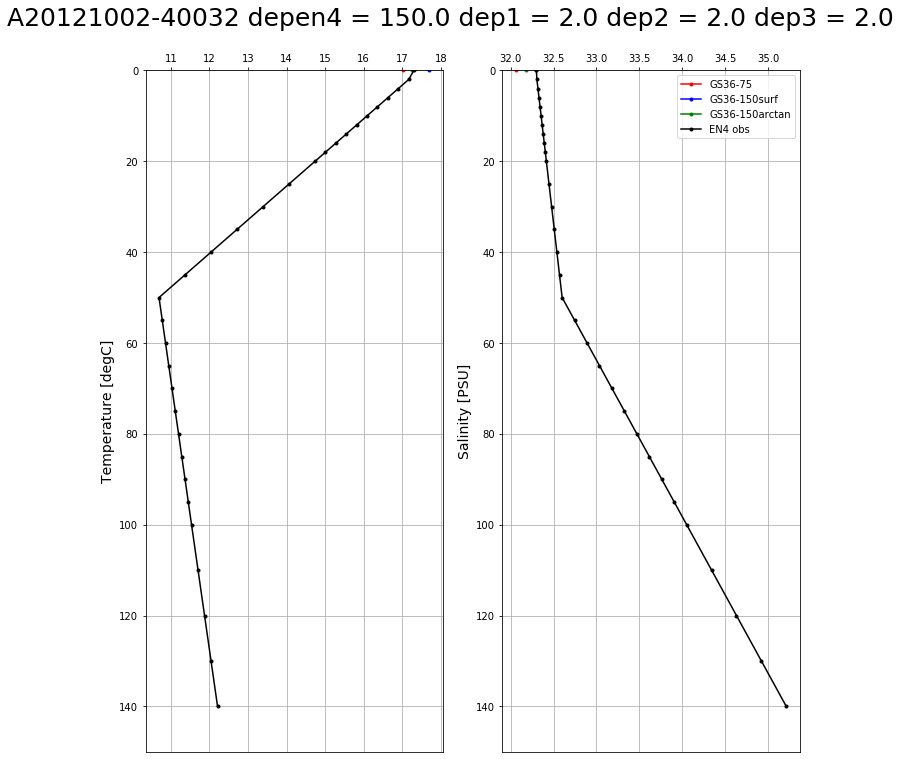

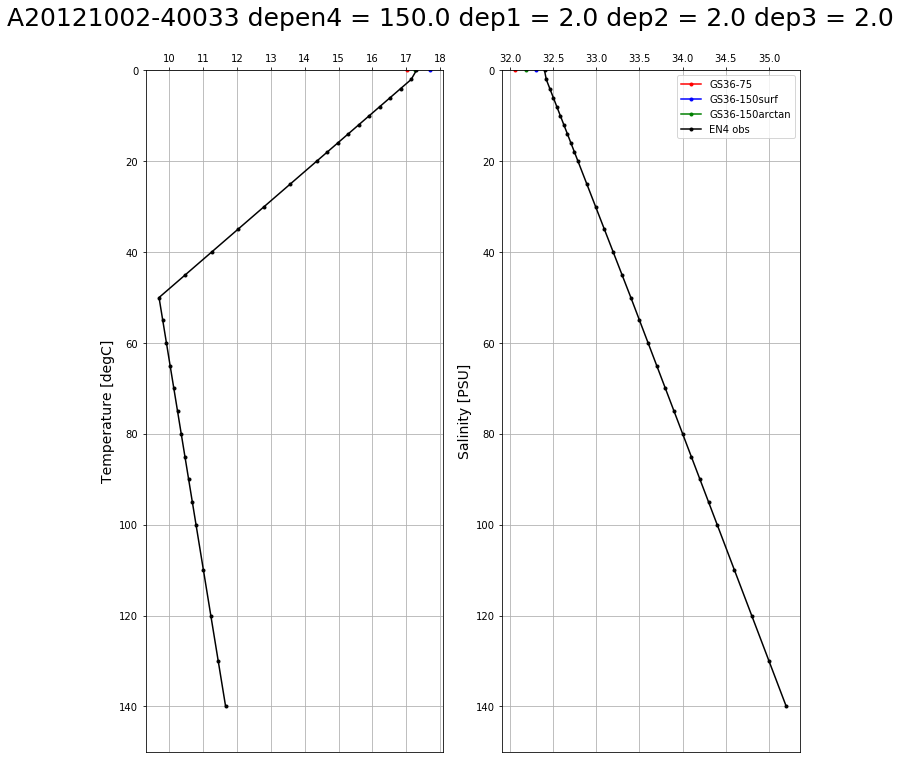

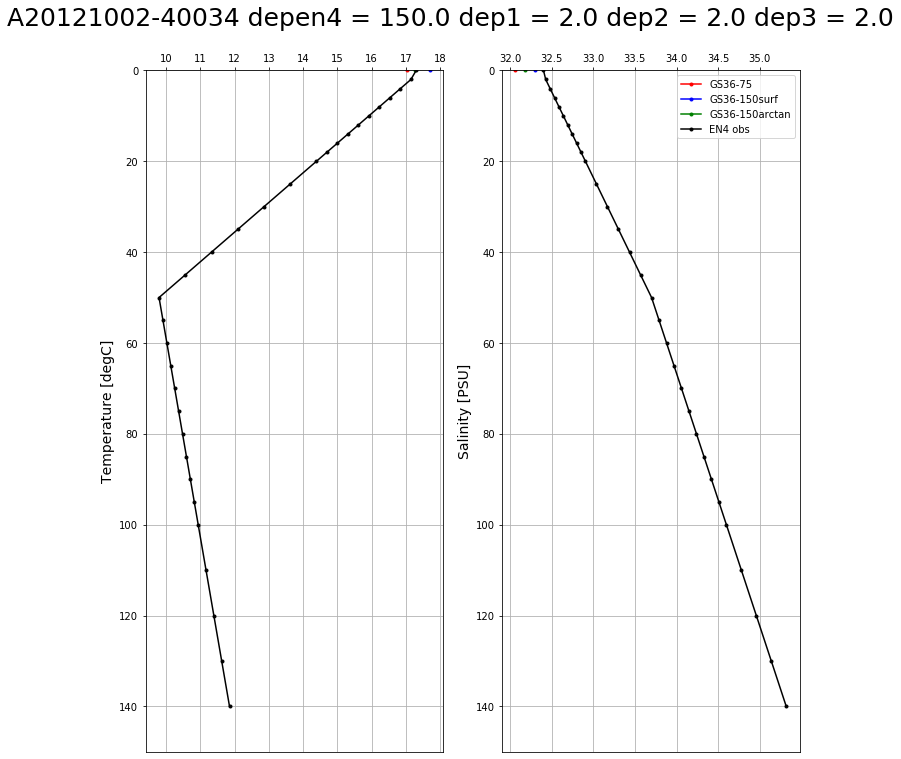

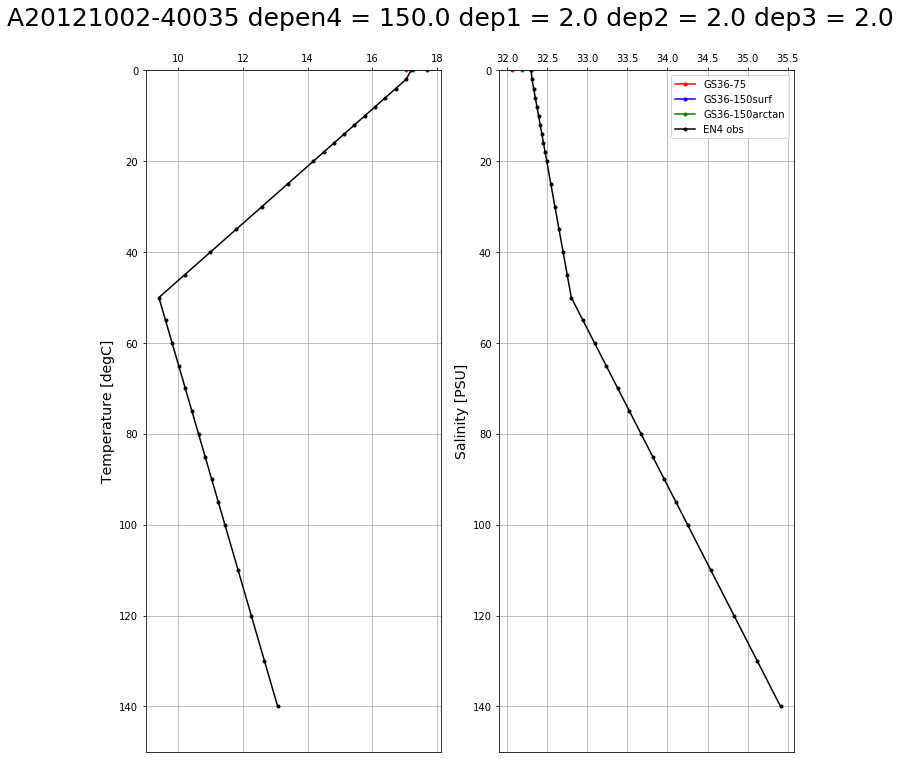

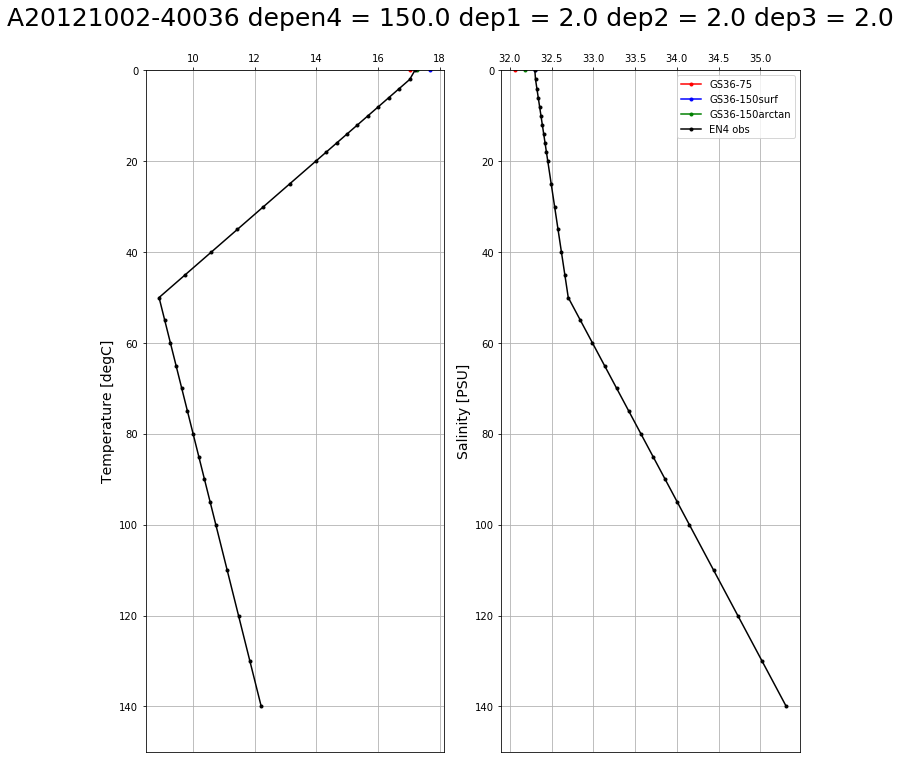

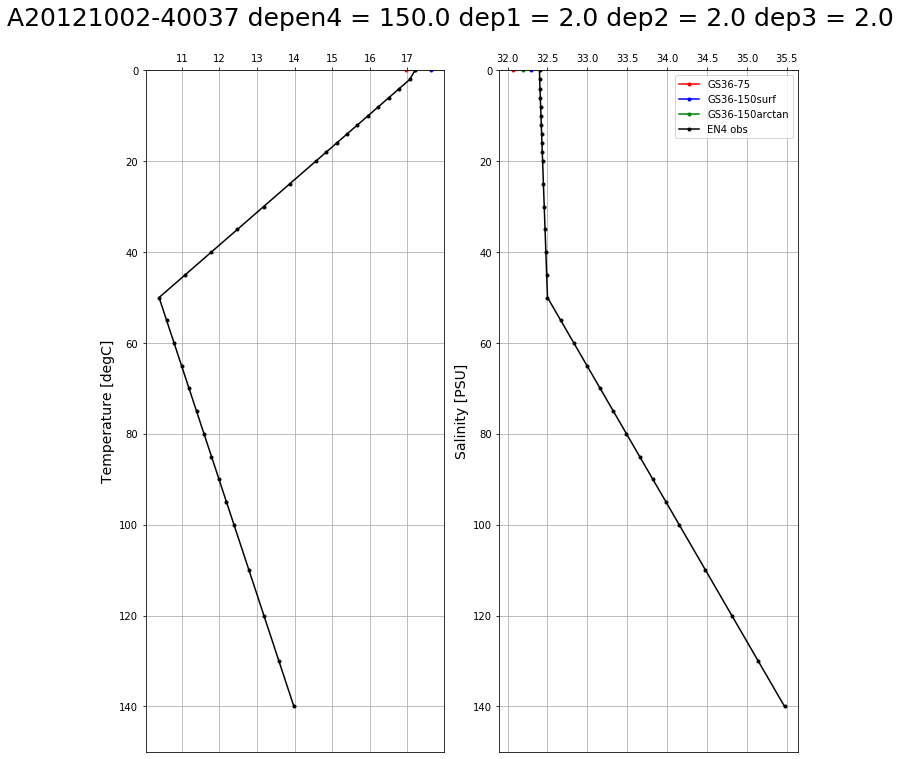

In [7]:
    namezone='NATL60-CJM165_'+reg+'_y2012-2013'
    jsonfile='/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_'+reg+'_y2012-2013/NATL60-CJM165_'+reg+'_y2012-2013_final.json'
    dirn1='/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_'+reg+'_y2012-2013/'+config+'-MPC001/'    
    dirn2='/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_'+reg+'_y2012-2013/'+config+'-MPC002/'    
    dirn3='/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_'+reg+'_y2012-2013/'+config+'-MPC003/'    
    
    #averaging the data in boxes

    vert_standart=[0,2,4,6,8,10,12,14,16,18,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,110,120,130,140,150,160,170,180,190,200,220,240,260,280,300,320,340,360,380,400,420,440,460,480,500,520,540,560,580,600,620,640,660,680,700,720,740,760,780,800,820,840,860,880,900,920,940,960,980,1000,1050,1100,1150,1200,1250,1300,1350,1400,1450,1500,1550,1600,1650,1700,1750,1800,1850,1900,1950,2000]

    def get_netcdf_profiles(netcdf_name):

        dsprof=xr.open_dataset(netcdf_name)
        depth=dsprof['depth_en4']
        temp_en4=dsprof['temp_profileEN4']
        salt_en4=dsprof['salt_profileEN4']
        mean_temp_model=dsprof['mean_temp_model']
        mean_salt_model=dsprof['mean_salt_model']
        percent10_temp_model=dsprof['percent10_temp_model']
        percent10_salt_model=dsprof['percent10_salt_model']
        percent90_temp_model=dsprof['percent90_temp_model']
        percent90_salt_model=dsprof['percent90_salt_model']

        return depth,temp_en4,salt_en4,mean_temp_model,mean_salt_model

    sourcefile=open(jsonfile,'rU')
    infos=json.load(sourcefile)
    nb_profilesEN4=len(infos)


    for prof in np.arange(100):
        list_profiles = infos.keys()
        reference = str(list(list_profiles)[prof])
        reference_profile=reference[-16:-1]
        outname1=dirn1+"/profiles_EN4-"+reference_profile+"_"+config+"-MPC001_TS_vert-stand.nc"
        outname2=dirn2+"/profiles_EN4-"+reference_profile+"_"+config+"-MPC002_TS_vert-stand.nc"
        outname3=dirn3+"/profiles_EN4-"+reference_profile+"_"+config+"-MPC003_TS_vert-stand.nc"

        if os.path.exists(outname1):
            print('ok for MPC001')
            depth,temp_en4,salt_en4,mean_temp_model1,mean_salt_model1 = get_netcdf_profiles(outname1)
        else:
            print('not for MPC001')

        if os.path.exists(outname2):
            print('ok for MPC002')
            depth,temp_en4,salt_en4,mean_temp_model2,mean_salt_model2 = get_netcdf_profiles(outname2)
        else:
            print('not for MPC002')

        if os.path.exists(outname3):
            print('ok for MPC003')
            depth,temp_en4,salt_en4,mean_temp_model3,mean_salt_model3 = get_netcdf_profiles(outname3)
        else:
            print('not for MPC003')

        ien4=np.where(np.isnan(temp_en4)==True)
        imod1=np.where(np.isnan(mean_temp_model1)==True)
        imod2=np.where(np.isnan(mean_temp_model2)==True)
        imod3=np.where(np.isnan(mean_temp_model3)==True)
        if len(ien4[:][0]) >0:
            d=depth[np.min(ien4[:][0])].values
        else:
            d=2000
        if d>100:
            dm1=depth[np.min(imod1[:][0])].values
            dm2=depth[np.min(imod1[:][0])].values
            dm3=depth[np.min(imod1[:][0])].values
            plot_prof(d,dm1,dm2,dm3,reference_profile,temp_en4,salt_en4,mean_temp_model1,mean_salt_model1,mean_temp_model2,mean_salt_model2,mean_temp_model3,mean_salt_model3)


In [ ]:
import numpy as np
truc=200-np.nan

In [ ]:
if np.abs(truc) < 10:
    print('inferieur')
else:
    print('superieur')